# Papcorns Data Scientist Task - Getting Started

This notebook will help you get started with the Papcorns data scientist technical assessment. We'll show you how to:
1. Install requirements and do the imports
2. Connect to the SQLite database
3. Load the data into pandas DataFrames

First, let's import the required libraries:

## Installing Requirements

Let's install the required libraries:

In [ ]:
!pip install -r requirements.txt

## Imports

Let's do the imports:

In [20]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# Set plotting style
# plt.style.use('seaborn')
# sns.set_palette('deep')

## Connecting to the Database

Let's establish a connection to the SQLite database:

In [32]:
# Connect to the SQLite database
conn = sqlite3.connect('papcorns.sqlite')

## Exploring the Data Structure

Let's look at the structure of our tables:

In [82]:
# Load users table
users_df = pd.read_sql_query("SELECT * FROM users;", conn)
print("Users table preview:")
display(users_df)

# Load events table
events_df = pd.read_sql_query("SELECT * FROM user_events;", conn)
print("\nUser events table preview:")
display(events_df)


Users table preview:


,id,created_at,attribution_source,country,name
0,1,2024-05-07T00:00:00,instagram,US,Eve Brown
1,2,2024-10-12T00:00:00,instagram,NL,Frank Moore
2,3,2024-10-15T00:00:00,tiktok,TR,Ivy Anderson
3,4,2024-08-28T00:00:00,tiktok,TR,Alice Brown
4,5,2024-04-03T00:00:00,organic,NL,Bob Moore
...,...,...,...,...,...
997,998,2025-02-01T00:00:00,instagram,TR,Bob Davis
998,999,2024-12-24T00:00:00,organic,NL,Charlie Davis
999,1000,2025-02-13T00:00:00,organic,NL,Jack Anderson
1000,1001,2025-02-16T00:00:00,instagram,US,Bruce Wayne



User events table preview:


,id,created_at,user_id,event_name,amount_usd
0,1,2024-05-07T00:00:00,1,app_install,NaN
1,2,2024-05-12T00:00:00,1,trial_started,NaN
2,3,2024-05-24T00:00:00,1,trial_cancelled,NaN
3,4,2024-10-12T00:00:00,2,app_install,NaN
4,5,2024-10-13T00:00:00,2,trial_started,NaN
...,...,...,...,...,...
3481,3482,2025-02-25T00:00:00,1000,trial_cancelled,NaN
3482,3483,2025-02-25T00:00:00,1001,app_install,NaN
3483,3484,2025-02-25T00:00:00,1001,trial_started,NaN
3484,3485,2025-02-25T00:00:00,1001,subscription_started,9.99


Önemli sütunların benzersiz değerlerine bakarak hangi değerlerinin alabileceğini araştırdım.

In [21]:
unique_attribution_source = users_df["attribution_source"].unique()
unique_country = users_df["country"].unique()

unique_event_name = events_df["event_name"].unique()

unique_values = {
    "Unique Attribution Sources": unique_attribution_source,
    "Unique Countries": unique_country,
    "Unique Event Names": unique_event_name,
}

unique_values


{'Unique Attribution Sources': array(['instagram', 'tiktok', 'organic'], dtype=object),
 'Unique Countries': array(['US', 'NL', 'TR'], dtype=object),
 'Unique Event Names': array(['app_install', 'trial_started', 'trial_cancelled',
        'subscription_started', 'subscription_renewed',
        'subscription_cancelled'], dtype=object)}

### PLT FONKSIYON TANIMLAMA

Veri analizi kısmında sürekli grafik çizdirme kodları kullanmaktansa fonskiyon haline getirdim.

In [22]:
def draw_pie_chart(x, y, startangle, title):
    plt.figure(figsize=(8, 8))
    plt.pie(
        x,
        labels=y,
        autopct="%1.1f%%",
        startangle=startangle,
        wedgeprops={"edgecolor": "black"})
    plt.title(title)
    plt.show()


def draw_bar_plot(x, y, title, xlabel, ylabel):
    sorted_indices = sorted(range(len(y)), key=lambda k: y[k], reverse=True)
    x = [x[i] for i in sorted_indices]
    y = [y[i] for i in sorted_indices]
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x=x, y=y, palette="viridis")
    
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    
    for index, value in enumerate(y):
        plt.text(index, value + max(y) * 0.02, f"{value:.2f}", ha='center', fontsize=10, fontweight='bold')
    
    plt.show()

def draw_horizontal_bar_plot(x, y, title, xlabel, ylabel):
    sorted_indices = sorted(range(len(y)), key=lambda k: y[k], reverse=True)
    x = [x[i] for i in sorted_indices]
    y = [y[i] for i in sorted_indices]
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x=y, y=x, palette="viridis", orient="h")
    
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    
    for index, value in enumerate(y):
        plt.text(value + max(y) * 0.02, index, f"{value:.2f}", va='center', fontsize=10, fontweight='bold')
    
    plt.show()


# CORE TASKS

## 1. Calculate the total revenue generated from subscriptions for each country.


### Pandas

Burada iki tabloyu user_id ve id sütunları üzerinde merge yaparak verileri birleştirdik. 
Left join kullanıldı çünkü len(events_df) > len(user_df). Her veriyi doldurduk. 
Sol tarafta events_df olduğundan suffiex kısmına "_event" diğer tabloya ise "_user" ekledik. 
Gelir "subscription_started" ve "subscription_renewed" eventlerinden geldiği için bunlar seçtik ve ülkeye göre gruplayarak topladık.

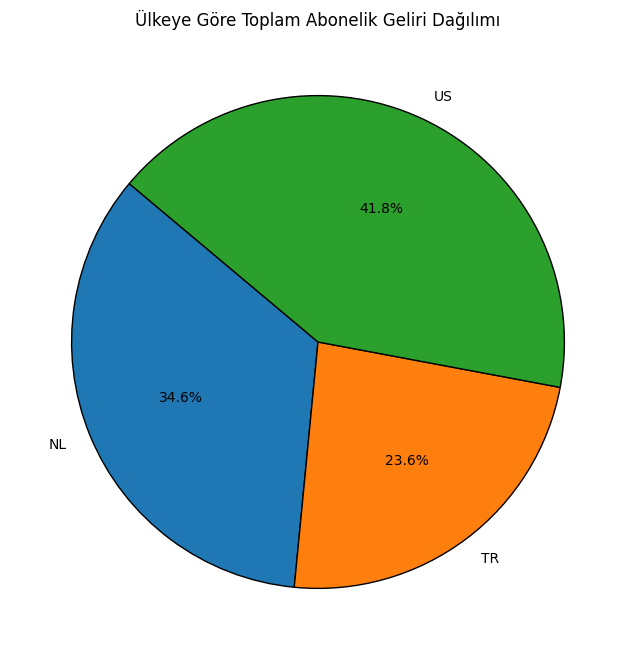

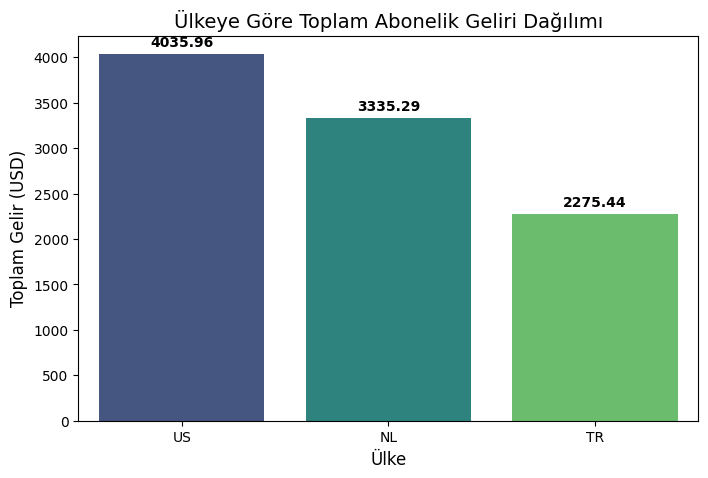

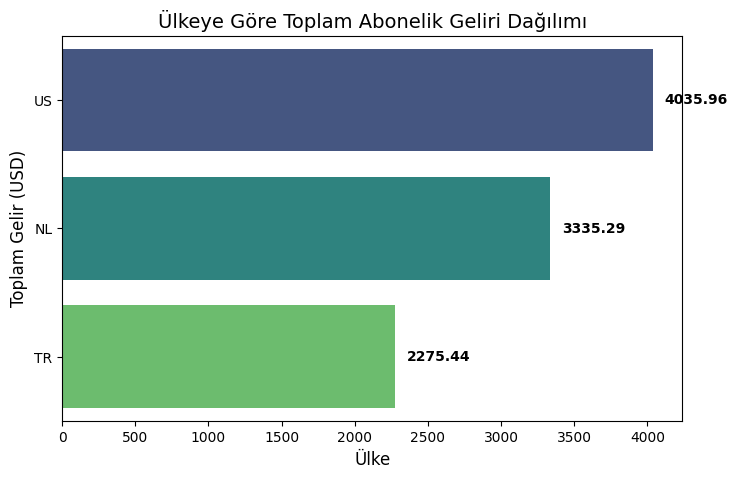

In [23]:
users_df = pd.read_sql_query("SELECT * FROM users;", conn)
events_df = pd.read_sql_query("SELECT * FROM user_events;", conn)
merged_df = events_df.merge(users_df, left_on="user_id", right_on="id", suffixes=("_event", "_user"))
subscription_events = merged_df[merged_df["event_name"].isin(["subscription_started", "subscription_renewed"])]
revenue_by_country = subscription_events.groupby("country")["amount_usd"].sum().reset_index()

x = revenue_by_country["amount_usd"]
y = revenue_by_country["country"]
title = "Ülkeye Göre Toplam Abonelik Geliri Dağılımı"
xlabel = "Ülke"
ylabel = "Toplam Gelir (USD)"

draw_pie_chart(x, y, 140, title)
draw_bar_plot(y, x, title, xlabel, ylabel)
draw_horizontal_bar_plot(y, x, title, xlabel, ylabel)

### SQL

Pandas'la yapılan işlemin aynısı SQL kullanılarak yapıldı.

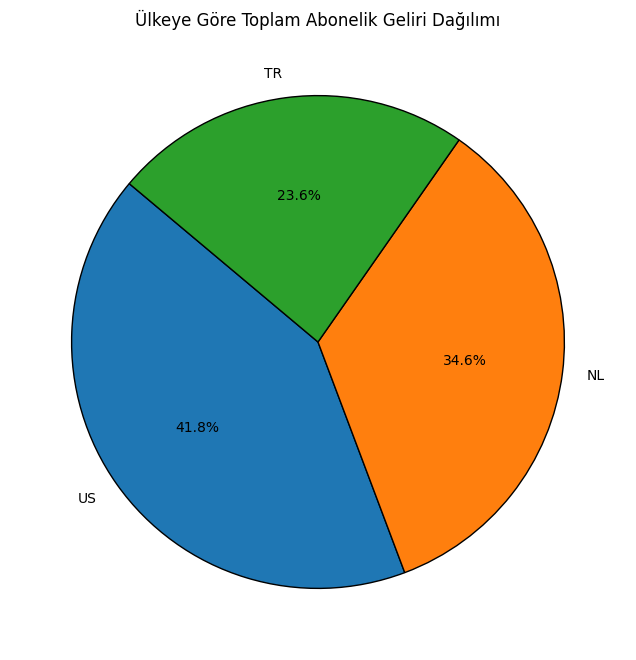

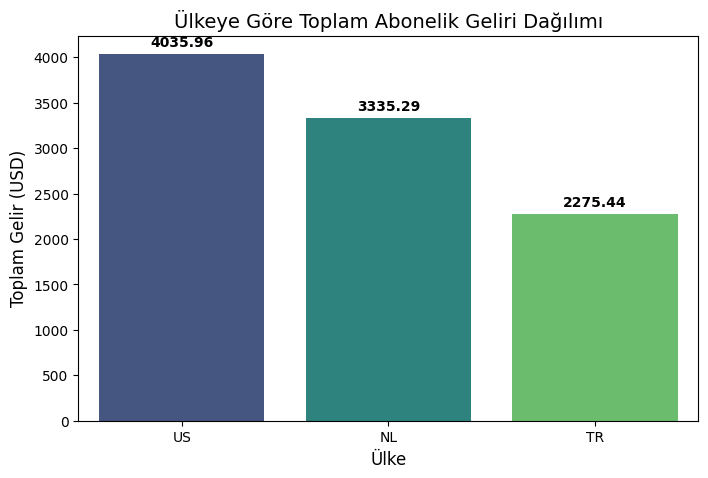

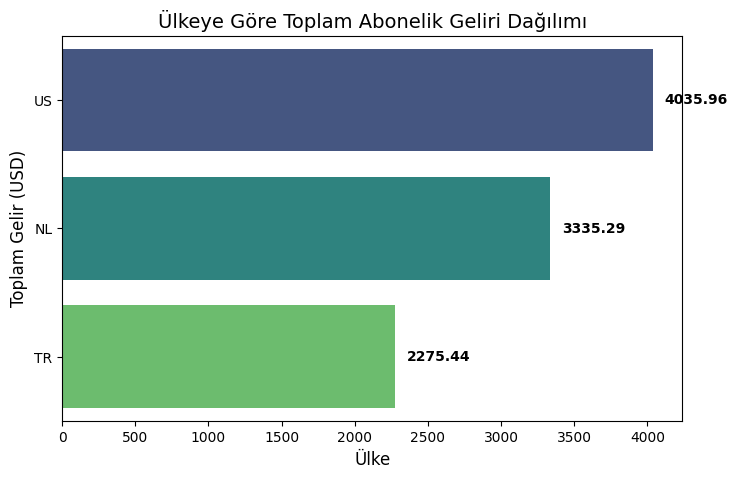

In [36]:
query = """
SELECT 
    u.country, 
    SUM(e.amount_usd) AS total_revenue
FROM user_events e
JOIN users u ON e.user_id = u.id
WHERE e.event_name IN ('subscription_started', 'subscription_renewed')
GROUP BY u.country
ORDER BY total_revenue DESC;
"""

revenue_by_country = pd.read_sql_query(query, conn)

x = revenue_by_country["total_revenue"]
y = revenue_by_country["country"]
title = "Ülkeye Göre Toplam Abonelik Geliri Dağılımı"
xlabel = "Ülke"
ylabel = "Toplam Gelir (USD)"

draw_pie_chart(x, y, 140, title)
draw_bar_plot(y, x, title, xlabel, ylabel)
draw_horizontal_bar_plot(y, x, title, xlabel, ylabel)


## 2. Calculate the total number of trials given to users who came from Instagram.


### Pandas

İki tabloyu da user_id'e göre merge işlemi yapıldı. Ardından event_name = "trial_started" olanlar alındı 
ve ardından "attribution_source"ye göre gruplanarak toplandı. 

In [38]:
trials_by_source = users_df.merge(events_df, left_on="id", right_on="user_id")
trials_by_source = trials_by_source[trials_by_source["event_name"] == "trial_started"]
trials_by_source = trials_by_source.groupby("attribution_source").size().reset_index(name="total_trials")

trials_by_source

,attribution_source,total_trials
0,instagram,210
1,organic,236
2,tiktok,236


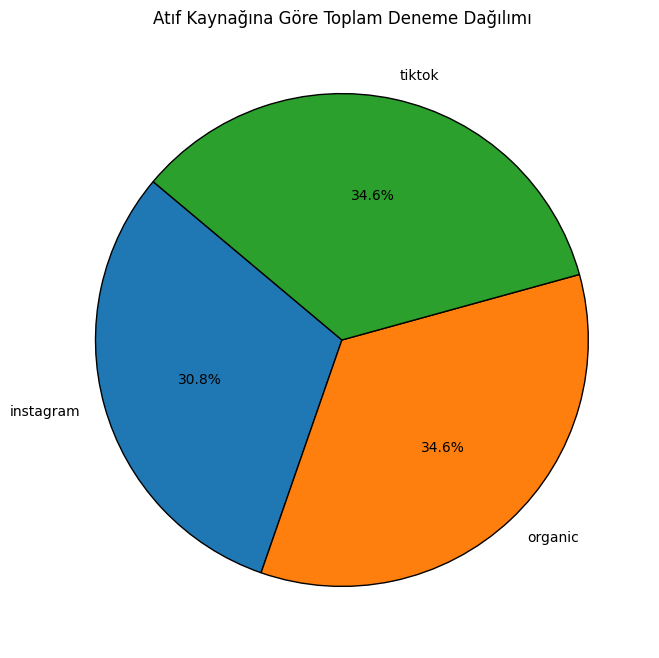

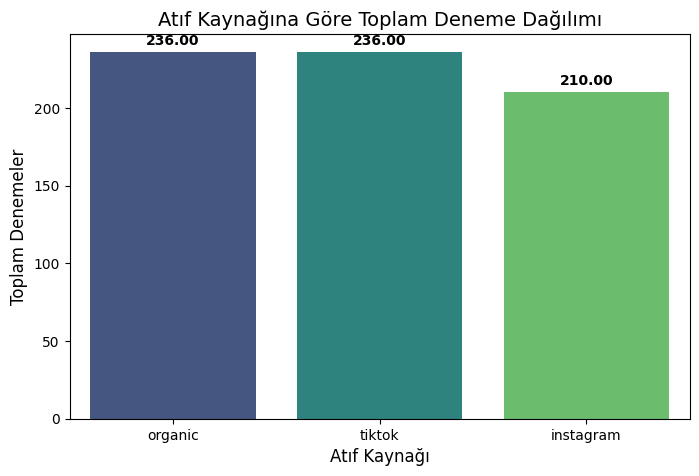

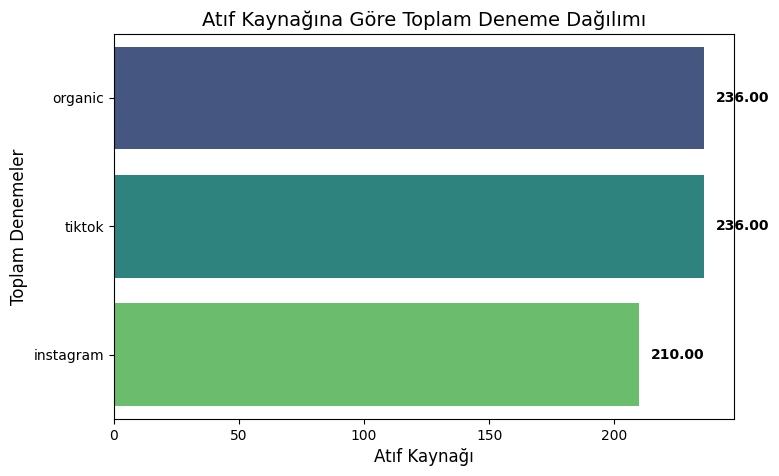

In [39]:
x = trials_by_source["total_trials"]
y = trials_by_source["attribution_source"]
title = "Atıf Kaynağına Göre Toplam Deneme Dağılımı"
xlabel = "Atıf Kaynağı"
ylabel = "Toplam Denemeler"


draw_pie_chart(x, y, 140, title)
draw_bar_plot(y, x, title, xlabel, ylabel)
draw_horizontal_bar_plot(y, x, title, xlabel, ylabel)

### SQL

In [16]:
query = """
SELECT COUNT(e.id) AS total_trials
FROM user_events e
JOIN users u ON e.user_id = u.id
WHERE u.attribution_source = 'instagram'
AND e.event_name = 'trial_started';
"""

sql_trial_count_df = pd.read_sql_query(query, conn)

sql_trial_count_df


,total_trials
0,210


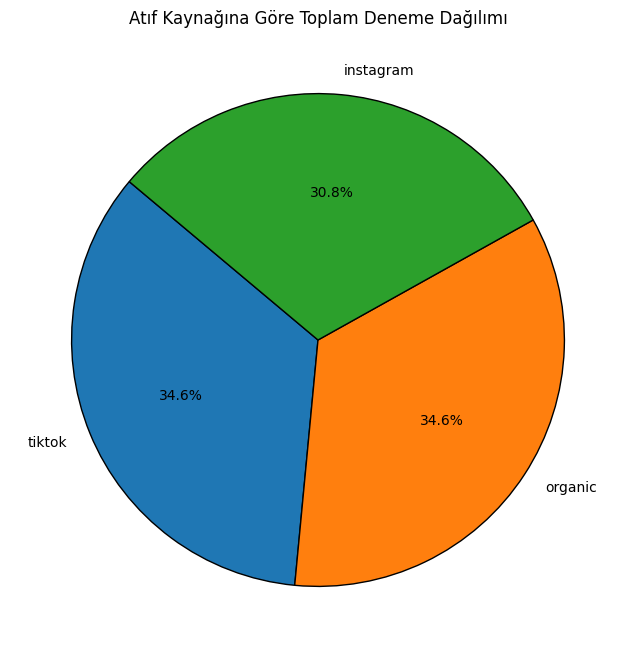

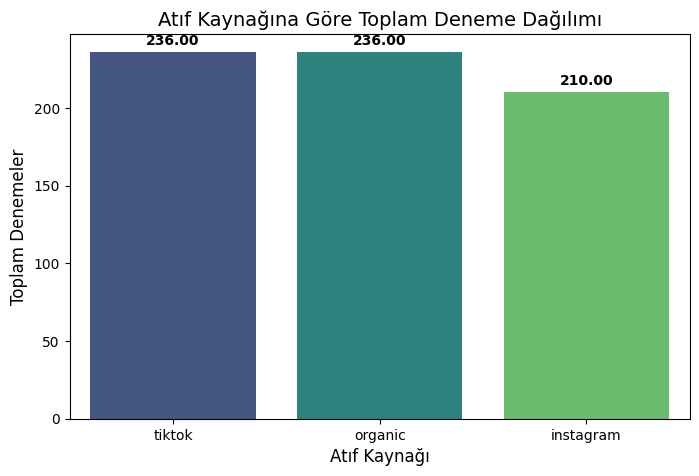

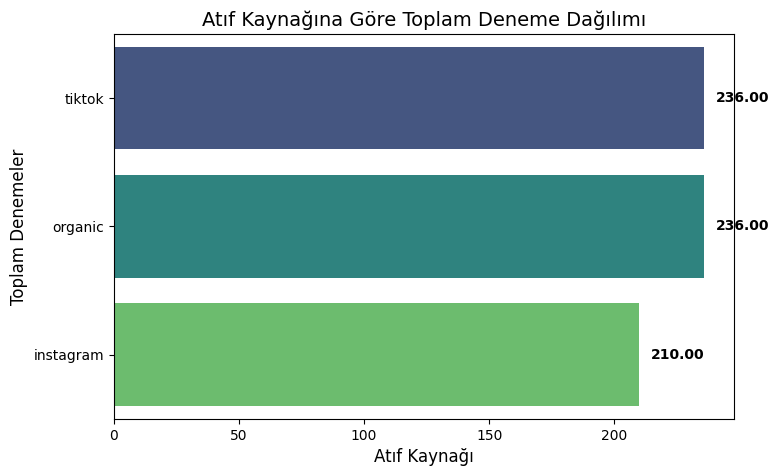

In [41]:
query = """
SELECT u.attribution_source, COUNT(e.id) AS total_trials
FROM user_events e
JOIN users u ON e.user_id = u.id
WHERE e.event_name = 'trial_started'
GROUP BY u.attribution_source
ORDER BY total_trials DESC;
"""

trials_by_source = pd.read_sql_query(query, conn)

x = trials_by_source["total_trials"]
y = trials_by_source["attribution_source"]
title = "Atıf Kaynağına Göre Toplam Deneme Dağılımı"
xlabel = "Atıf Kaynağı"
ylabel = "Toplam Denemeler"

draw_pie_chart(x, y, 140, title)
draw_bar_plot(y, x, title, xlabel, ylabel)
draw_horizontal_bar_plot(y, x, title, xlabel, ylabel)


## 3. Create a new column named 'acquisition_channel' by categorizing users based on their 'attribution_source':


### Pandas

Bu kod hücresinde ise "attribution_soruce"ye bir işlem uygulanıyor (.apply ile)
Eğer "instagram" veya "tiktok" ise "Paid" değilse "Organic" yapıyor. Ardından toplam adetler belirleniyor.

In [43]:
users_df["acquisition_channel"] = users_df["attribution_source"].apply(
    lambda x: "Paid" if x in ["instagram", "tiktok"] else "Organic"
)

acquisition_counts = users_df["acquisition_channel"].value_counts().reset_index()
acquisition_counts.columns = ["acquisition_channel", "user_count"]

acquisition_counts

,acquisition_channel,user_count
0,Paid,658
1,Organic,344


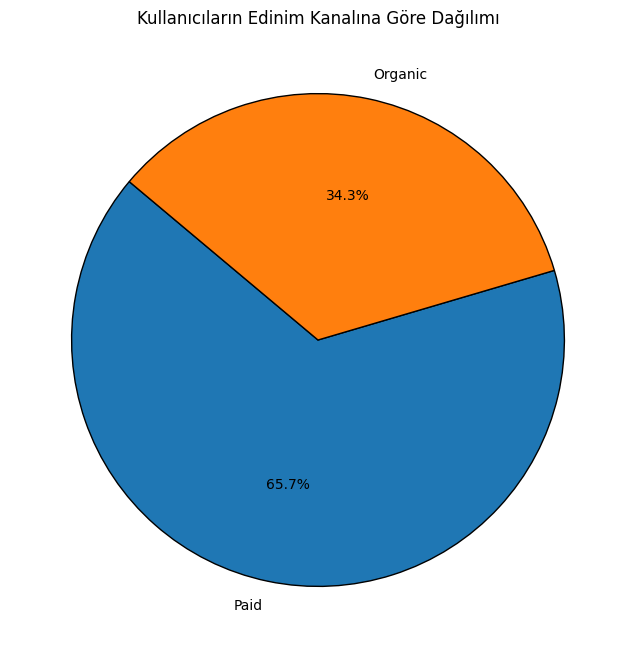

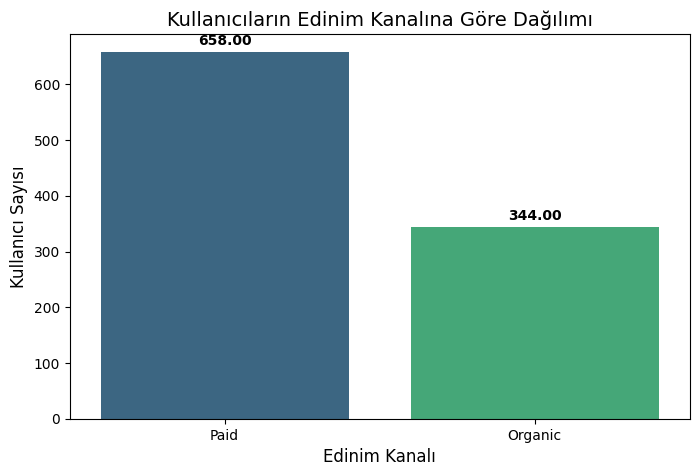

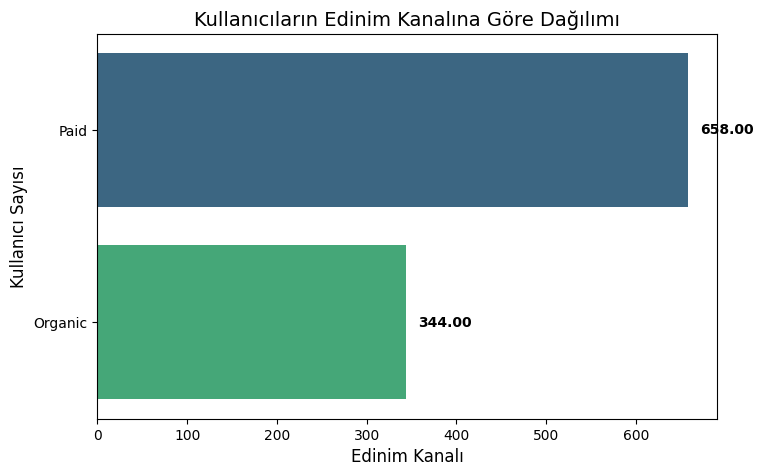

In [44]:
x = acquisition_counts["user_count"]
y = acquisition_counts["acquisition_channel"]
title = "Kullanıcıların Edinim Kanalına Göre Dağılımı"
xlabel = "Edinim Kanalı"
ylabel = "Kullanıcı Sayısı"

draw_pie_chart(x, y, 140, title)
draw_bar_plot(y, x, title, xlabel, ylabel)
draw_horizontal_bar_plot(y, x, title, xlabel, ylabel)


### SQL

In [215]:
query = """
SELECT 
    id,
    created_at,
    attribution_source,
    country,
    name,
    CASE 
        WHEN attribution_source IN ('instagram', 'tiktok') THEN 'Paid'
        ELSE 'Organic'
    END AS acquisition_channel
FROM users;
"""

users_with_channel = pd.read_sql_query(query, conn)

acquisition_counts = users_with_channel["acquisition_channel"].value_counts().reset_index()
acquisition_counts.columns = ["acquisition_channel", "user_count"]

acquisition_counts

,acquisition_channel,user_count
0,Paid,658
1,Organic,344


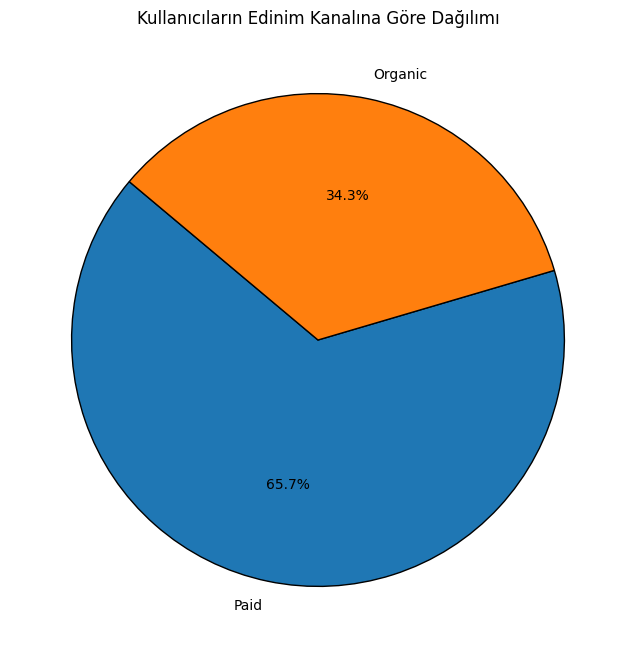

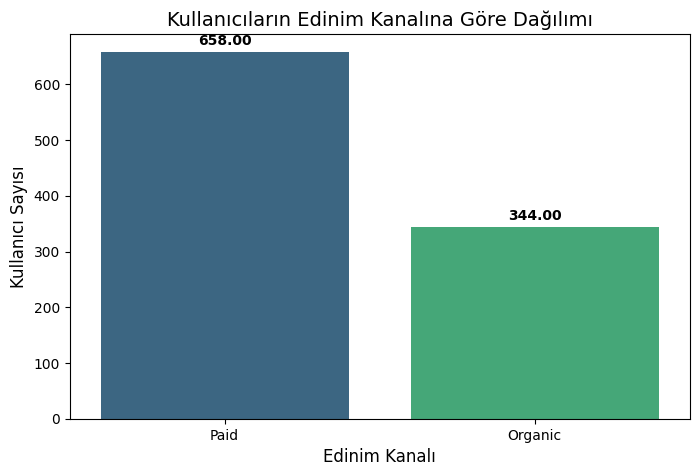

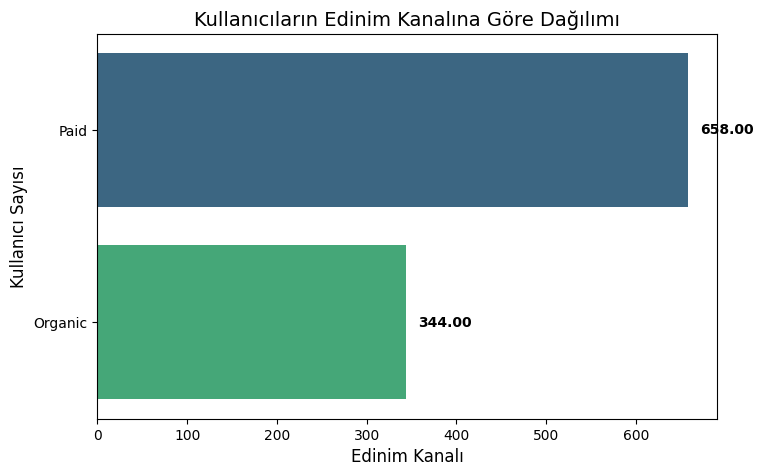

In [48]:
x = acquisition_counts["user_count"]
y = acquisition_counts["acquisition_channel"]
title = "Kullanıcıların Edinim Kanalına Göre Dağılımı"
xlabel = "Edinim Kanalı"
ylabel = "Kullanıcı Sayısı"

draw_pie_chart(x, y, 140, title)
draw_bar_plot(y, x, title, xlabel, ylabel)
draw_horizontal_bar_plot(y, x, title, xlabel, ylabel)

## 4. Analyze the trial-to-subscription conversion rate:


### Pandas

Deneme sürecini başlatanlar "trial_events", aboneliği başlatanlar "subscription_events" dataframesine alındı.
total_trials ise trial_events'te bulunan benzersiz "user_id" sayısı kadar belirlendi.
total_subscription ise subscription_event'te bulunan benzersiz "user_id" sayısı kadar belirlendi. Bunlar bölünerek genel dönüşün oranı bulundu.

Her platformu ayrı ayrı yapmak için ise attribution_source'ye göre gruplama işlemi yapıldı ve bunların benzersiz "user_id" değerinin sayısı alındı.

In [45]:
trial_events = events_df[events_df["event_name"] == "trial_started"]
subscription_events = events_df[events_df["event_name"] == "subscription_started"]

total_trials = trial_events["user_id"].nunique()
total_subscriptions = subscription_events["user_id"].nunique()
overall_conversion_rate = (total_subscriptions / total_trials) * 100 if total_trials > 0 else 0

trial_counts_by_source = trial_events.merge(users_df, left_on="user_id", right_on="id").groupby("attribution_source")["user_id"].nunique()
subscription_counts_by_source = subscription_events.merge(users_df, left_on="user_id", right_on="id").groupby("attribution_source")["user_id"].nunique()

conversion_rate_by_source = (subscription_counts_by_source / trial_counts_by_source) * 100
conversion_rate_by_source = conversion_rate_by_source.reset_index().fillna(0)
conversion_rate_by_source.columns = ["attribution_source", "conversion_rate"]

conversion_rate_by_source

,attribution_source,conversion_rate
0,instagram,70.952381
1,organic,71.610169
2,tiktok,69.067797


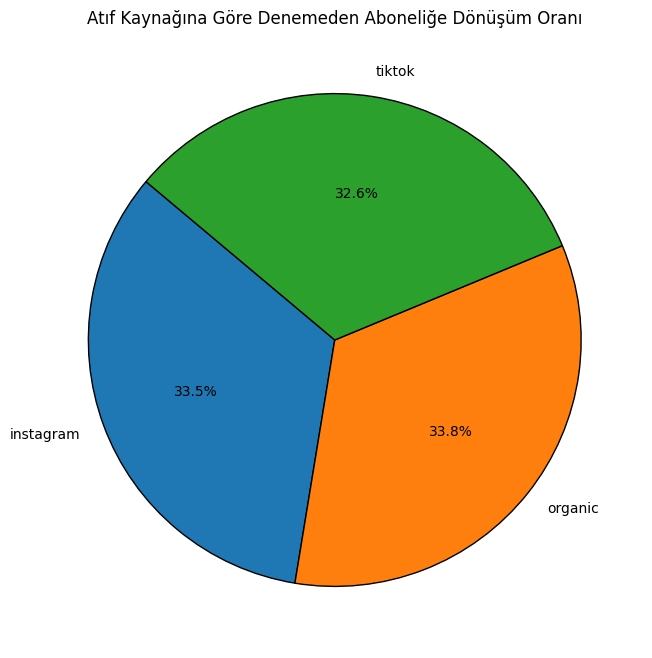

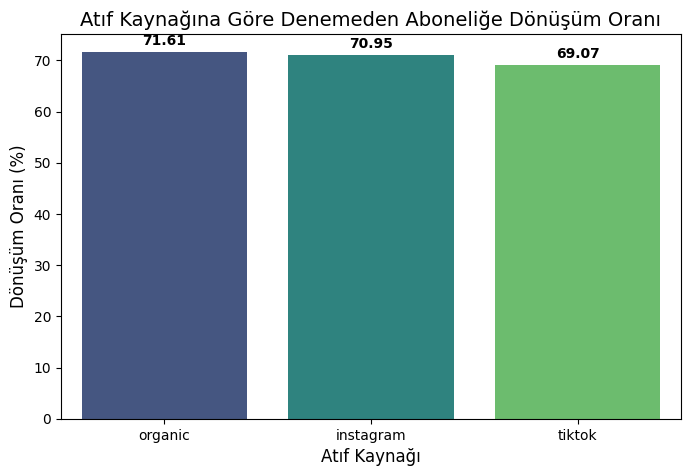

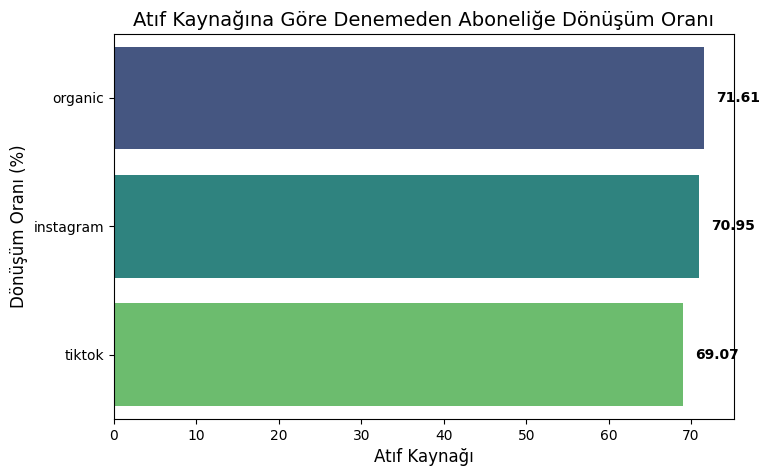

In [47]:
x = conversion_rate_by_source["conversion_rate"]
y = conversion_rate_by_source["attribution_source"]
title = "Atıf Kaynağına Göre Denemeden Aboneliğe Dönüşüm Oranı"
xlabel = "Atıf Kaynağı"
ylabel = "Dönüşüm Oranı (%)"

draw_pie_chart(x, y, 140, title)
draw_bar_plot(y, x, title, xlabel, ylabel)
draw_horizontal_bar_plot(y, x, title, xlabel, ylabel)

### SQL

  attribution_source  conversion_rate
0          instagram        70.952381
1            organic        71.610169
2             tiktok        69.067797


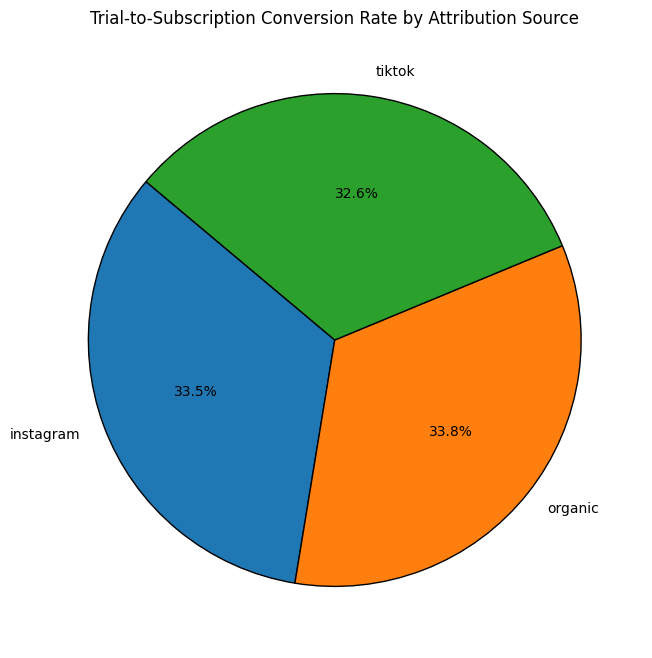

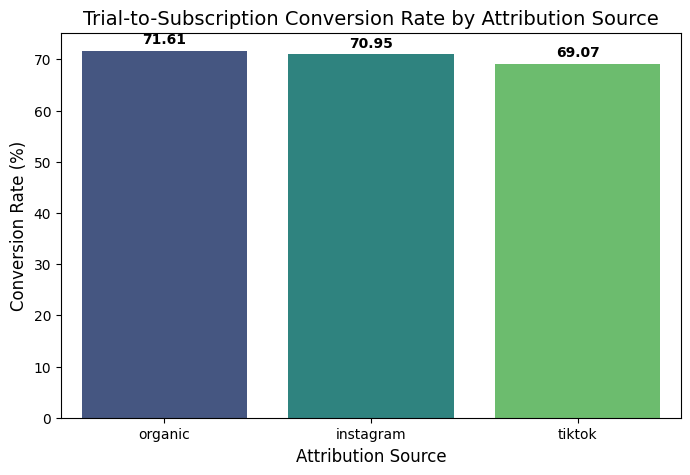

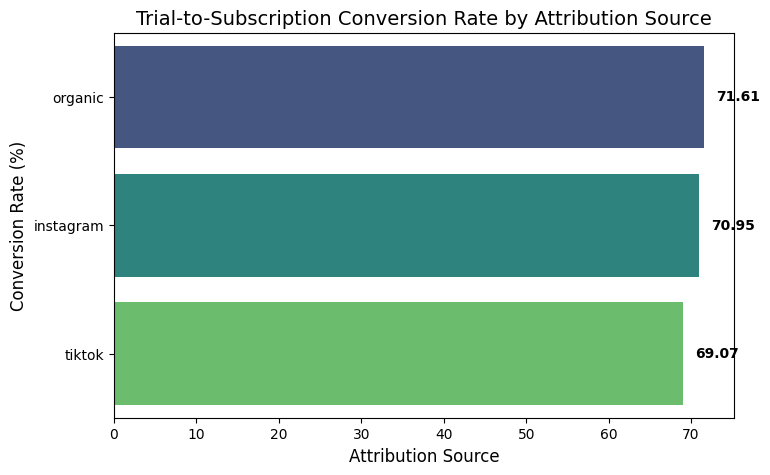

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

query = """
WITH trials AS (
    SELECT user_id, u.attribution_source
    FROM user_events e
    JOIN users u ON e.user_id = u.id
    WHERE e.event_name = 'trial_started'
),
subscriptions AS (
    SELECT user_id, u.attribution_source
    FROM user_events e
    JOIN users u ON e.user_id = u.id
    WHERE e.event_name = 'subscription_started'
)
SELECT 
    t.attribution_source,
    COUNT(DISTINCT s.user_id) * 100.0 / COUNT(DISTINCT t.user_id) AS conversion_rate
FROM trials t
LEFT JOIN subscriptions s ON t.user_id = s.user_id
GROUP BY t.attribution_source;
"""

conversion_rate_by_source = pd.read_sql_query(query, conn)

overall_query = """
WITH trials AS (
    SELECT DISTINCT user_id FROM user_events WHERE event_name = 'trial_started'
),
subscriptions AS (
    SELECT DISTINCT user_id FROM user_events WHERE event_name = 'subscription_started'
)
SELECT COUNT(DISTINCT s.user_id) * 100.0 / COUNT(DISTINCT t.user_id) AS overall_conversion_rate
FROM trials t
LEFT JOIN subscriptions s ON t.user_id = s.user_id;
"""

overall_conversion_rate = pd.read_sql_query(overall_query, conn).iloc[0, 0]

print(conversion_rate_by_source)

x = conversion_rate_by_source["conversion_rate"]
y = conversion_rate_by_source["attribution_source"]
title = "Trial-to-Subscription Conversion Rate by Attribution Source"
xlabel = "Attribution Source"
ylabel = "Conversion Rate (%)"

draw_pie_chart(x, y, 140, title)
draw_bar_plot(y, x, title, xlabel, ylabel)
draw_horizontal_bar_plot(y, x, title, xlabel, ylabel)


## 5. Calculate the median subscription duration (in months) for each country


### Pandas

İlk aşamada abonelik başlama ve iptal etme dataframe'leri ayarlandı. Ardından user_id'e göre merge işlemi yapıldı.
Daha sonra ülke bilgisi bulunmadığındna user_df tablosundan ülke bilgisi eklendi

In [49]:
subscription_start = events_df[events_df["event_name"] == "subscription_started"]
subscription_cancel = events_df[events_df["event_name"] == "subscription_cancelled"]

subscription_data = subscription_start.merge(subscription_cancel, on="user_id", suffixes=("_start", "_cancel"))

subscription_data = subscription_data.merge(users_df[["id", "country"]], left_on="user_id", right_on="id")

subscription_data

,id_start,created_at_start,user_id,event_name_start,amount_usd_start,id_cancel,created_at_cancel,event_name_cancel,amount_usd_cancel,id,country
0,6,2024-10-20T00:00:00,2,subscription_started,8.99,10,2025-02-12T00:00:00,subscription_cancelled,NaN,2,NL
1,13,2024-10-21T00:00:00,3,subscription_started,4.99,17,2025-01-20T00:00:00,subscription_cancelled,NaN,3,TR
2,28,2024-08-28T00:00:00,8,subscription_started,4.99,30,2024-10-16T00:00:00,subscription_cancelled,NaN,8,TR
3,33,2024-11-21T00:00:00,9,subscription_started,9.99,35,2024-12-27T00:00:00,subscription_cancelled,NaN,9,US
4,38,2024-04-27T00:00:00,10,subscription_started,9.99,40,2024-06-03T00:00:00,subscription_cancelled,NaN,10,US
...,...,...,...,...,...,...,...,...,...,...,...
365,3443,2025-02-27T00:00:00,991,subscription_started,4.99,3447,2025-06-22T00:00:00,subscription_cancelled,NaN,991,TR
366,3450,2025-02-10T00:00:00,992,subscription_started,9.99,3455,2025-06-20T00:00:00,subscription_cancelled,NaN,992,US
367,3460,2024-10-17T00:00:00,995,subscription_started,9.99,3463,2025-01-08T00:00:00,subscription_cancelled,NaN,995,US
368,3466,2025-02-06T00:00:00,996,subscription_started,4.99,3469,2025-05-03T00:00:00,subscription_cancelled,NaN,996,TR


Burada tarihler "to_datetime" yapısı ile zaman birimine çevirildi. Ardındna 2 tarih arasındaki farklı hesaplama işlemi yapıldı.
Bunun için gerekli formül şudur:
(YIL(B2) - YIL(A2)) * 12 + AY(B2) - AY(A2)Kaynak: https://www.ogsmm.com/161-iki-tarih-arasi-ay-hesaplama---excel


In [51]:
subscription_data["created_at_start"] = pd.to_datetime(subscription_data["created_at_start"])
subscription_data["created_at_cancel"] = pd.to_datetime(subscription_data["created_at_cancel"])

subscription_data["subscription_duration_months"] = (
    (subscription_data["created_at_cancel"].dt.year - subscription_data["created_at_start"].dt.year) * 12 +
    (subscription_data["created_at_cancel"].dt.month - subscription_data["created_at_start"].dt.month)
)

median_subscription_duration_split = subscription_data.groupby("country")["subscription_duration_months"].median().reset_index()
median_subscription_duration_split


,country,subscription_duration_months
0,NL,2.0
1,TR,2.0
2,US,2.0


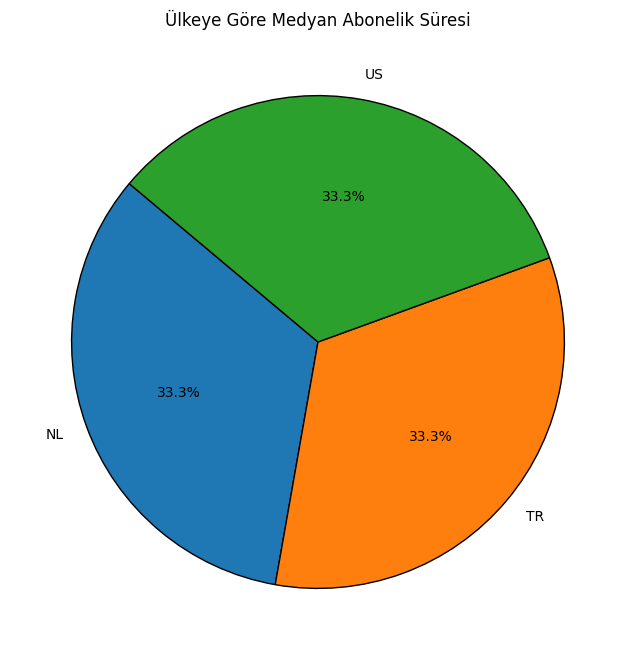

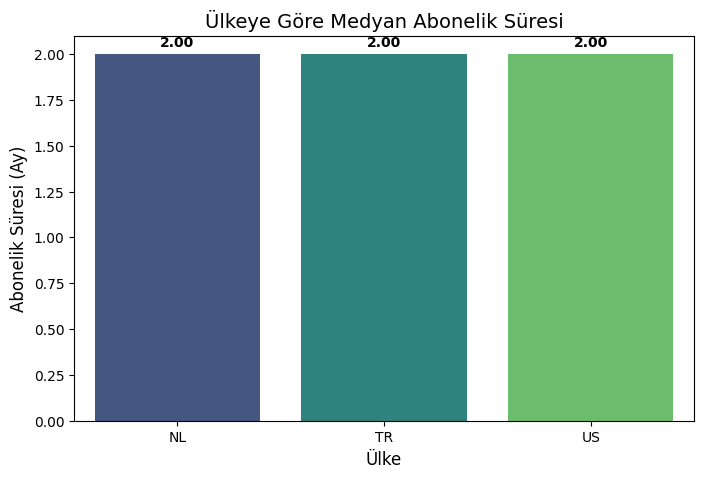

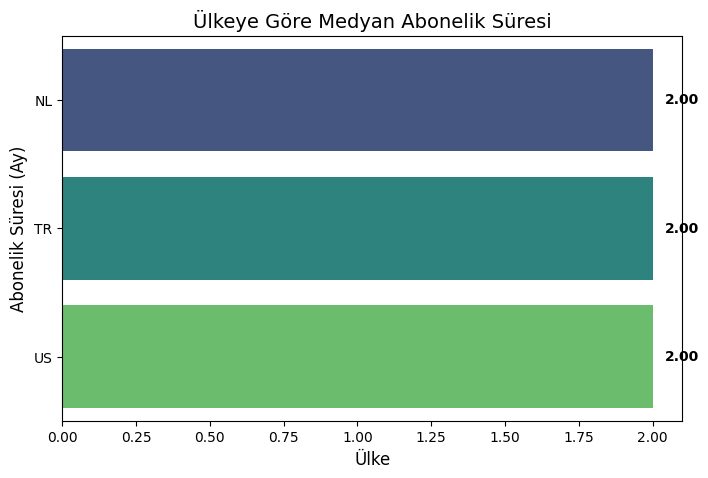

In [52]:
# Görselleştirme için değişkenleri tanımla
x = median_subscription_duration_split["subscription_duration_months"]
y = median_subscription_duration_split["country"]
title = "Ülkeye Göre Medyan Abonelik Süresi"
xlabel = "Ülke"
ylabel = "Abonelik Süresi (Ay)"

draw_pie_chart(x, y, 140, title)
draw_bar_plot(y, x, title, xlabel, ylabel)
draw_horizontal_bar_plot(y, x, title, xlabel, ylabel)


## 6. Calculate the Average Lifetime Value (LTV) by country


### Pandas

Burada bize gelir kazandıran eventler "subscription_started" ve "subscription_renewed" olduğundna bunları aldık. Her kullanıcı birden fazla işlem yapabildiğinden kullanıcıya göre toplam geliri gruplayarak gösterdik. Daha sonra user_df ile bilgileri birleştirildi.

In [54]:
subscription_revenue = events_df[events_df["event_name"].isin(["subscription_started", "subscription_renewed"])]

# Kullanıcı başına ortalama geliri hesapla
avg_revenue_per_user = subscription_revenue.groupby("user_id")["amount_usd"].sum().reset_index()

# Kullanıcıların ülke bilgilerini ekleyelim
avg_revenue_per_user = avg_revenue_per_user.merge(users_df, left_on="user_id", right_on="id")

avg_revenue_per_user


,user_id,amount_usd,id,created_at,attribution_source,country,name,acquisition_channel
0,2,35.96,2,2024-10-12T00:00:00,instagram,NL,Frank Moore,Paid
1,3,19.96,3,2024-10-15T00:00:00,tiktok,TR,Ivy Anderson,Paid
2,8,9.98,8,2024-08-14T00:00:00,tiktok,TR,Alice Moore,Paid
3,9,19.98,9,2024-11-05T00:00:00,organic,US,Frank Anderson,Organic
4,10,19.98,10,2024-04-12T00:00:00,organic,US,David Anderson,Organic
...,...,...,...,...,...,...,...,...
476,992,49.95,992,2025-02-07T00:00:00,instagram,US,Grace Jones,Paid
477,995,29.97,995,2024-09-30T00:00:00,instagram,US,Frank Smith,Paid
478,996,14.97,996,2025-01-28T00:00:00,organic,TR,Jack Anderson,Organic
479,999,26.97,999,2024-12-24T00:00:00,organic,NL,Charlie Davis,Organic


Sonrasında ülkeye göre gruplama işlemi yapılarak median değeri hesaplandı.

In [55]:
avg_revenue_by_country = avg_revenue_per_user.groupby("country")["amount_usd"].mean().reset_index()
avg_revenue_by_country.columns = ["country", "avg_revenue_per_user"]
avg_revenue_by_country

,country,avg_revenue_per_user
0,NL,22.384497
1,TR,13.306667
2,US,25.068075


LTV Hesaplama Formülü. Kaynak: https://blog.getlatka.com/ltv-cac-ratio/
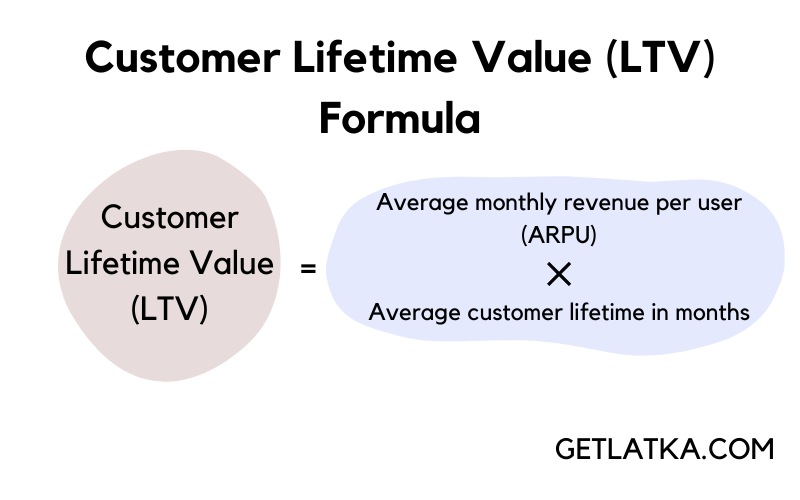

Burada dikkat ediilmesi gereken ilk aşamada ülke başına kullanıcılardan ortalama elde edilen geliri hesaplıyoruz.
Fakat LTV'yi hesaplamak için bu ülkelerde ortalama kaç ay ödeme yaptığının da hesap edilmesi ve bunların birbiri ile çarpılması gerekiyor. 

In [58]:
# LTV hesaplama (LTV = Ortalama Gelir x Medyan Abonelik Süresi)
median_subscription_duration = median_subscription_duration_split
ltv_by_country = avg_revenue_by_country.merge(median_subscription_duration, on="country")
ltv_by_country["LTV"] = ltv_by_country["avg_revenue_per_user"] * ltv_by_country["subscription_duration_months"]
ltv_by_country

,country,avg_revenue_per_user,subscription_duration_months,LTV
0,NL,22.384497,2.0,44.768993
1,TR,13.306667,2.0,26.613333
2,US,25.068075,2.0,50.136149


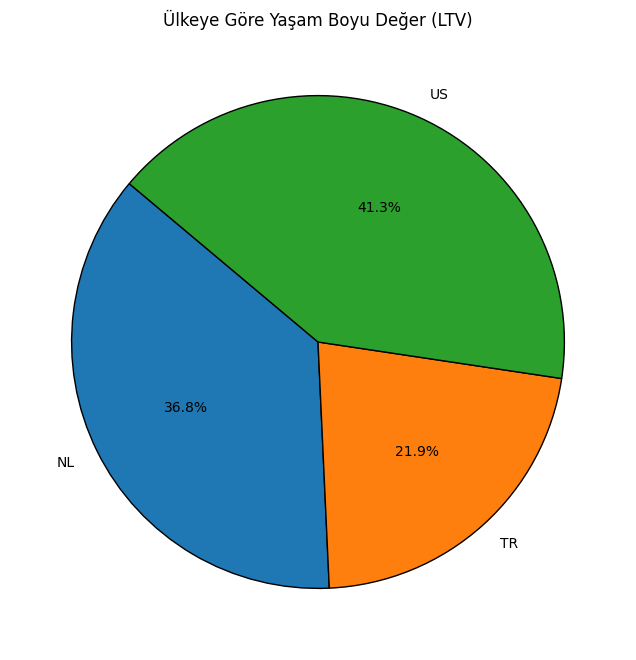

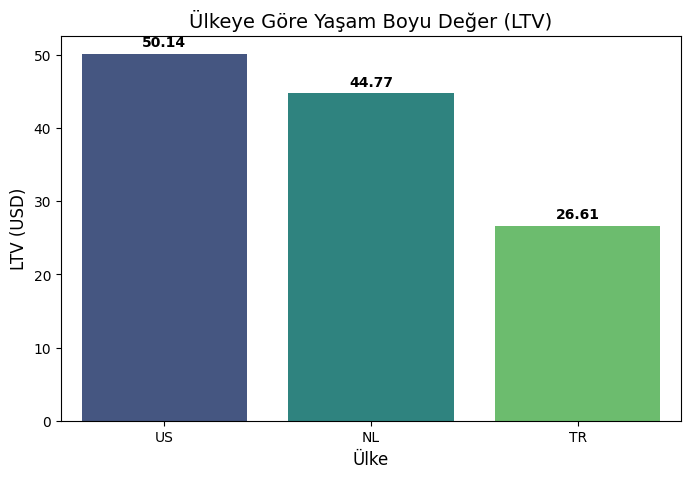

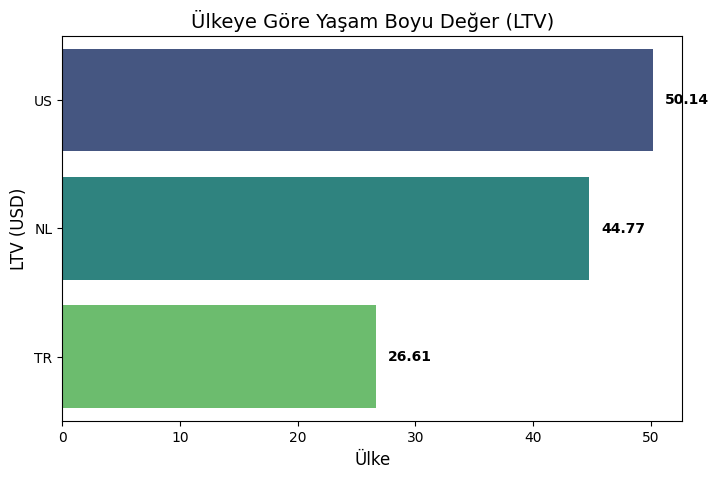

In [59]:
x = ltv_by_country["LTV"]
y = ltv_by_country["country"]
title = "Ülkeye Göre Yaşam Boyu Değer (LTV)"
xlabel = "Ülke"
ylabel = "LTV (USD)"

draw_pie_chart(x, y, 140, title)
draw_bar_plot(y, x, title, xlabel, ylabel)
draw_horizontal_bar_plot(y, x, title, xlabel, ylabel)


## 7. Predict the churn probability for user #1002 (Clark Kent)


BURADA YAPMAM GEREKEN İLK ÖNCE VERİLERİ KENDİ YORUMLAMA MANTIĞIMA GÖRE DÜZENLEMEM. BURADA CHURN FARKLI YORUMLANMA DURUMU OLAN BİR KAVRAMDIR. 
CHURN OLMA İHTİMALİNİ 2 DURUMDA DÜŞÜNEBİLİRİZ:
1) EĞER KULLANICI ABONELİK ALIP DAHA SONRA KULLANIP İPTAL ETTİYSE BU BİR CHURN'DUR. AYNI ZAMANDA EĞER KULLANICI DENEME SÜRECİNİ BAŞLATIP ABONE OLMAYIP DENEME SÜRECİNİ İPTAL ETTİYSE BU DA BİR CHURN OLABİLİR. ÇÜNKÜ POTANSİYEL MÜŞTERİMİZİ KAYBETTİK.
2) DİĞER İHTİMAL İSE ABONELİK ALIP DAHA SONRA KULLANIP İPTAL ETTİYSE BU BİR CHURN'DUR. FAKAT KULLANICI DENEME SÜRECİNİ BAŞLATIP ABONE OLMAYIP DENEME SÜRECİNİ İPTAL ETTİYSE BİZ BU KULLANICIDAN ZATEN HİÇ KAZANÇ ELDE ETMEMİŞİZ O YÜZDEN BUNU CHURN OLARAK SINIFLANDIRMAYABİLİRİZ. ÇÜNKÜ ZATEN BİZE HİÇ ÖDEME YAPMAMIŞ 

### iLK OLARAK 1. DURUMU XGBOOST, SVM, RANDOM FOREST GİBİ MAKİNE ÖĞRENMESİ ALGORİTMALARIYLA VE YAPAY SİNİR AĞIYLA TEST EDELİM.

#### VERİ SETİNİ MODELE UYGUN HALE GETİRME

In [1]:
import sqlite3
import pandas as pd
import numpy as np

In [2]:
db_path = "papcorns.sqlite"
conn = sqlite3.connect(db_path)

users_df = pd.read_sql_query("SELECT * FROM users;", conn)
events_df = pd.read_sql_query("SELECT * FROM user_events;", conn)

In [3]:
# event_name kolonunu one hot encode haline getirdik user_id'e göre
event_features = events_df.pivot_table(index="user_id", columns="event_name", aggfunc="size", fill_value=0).reset_index()

event_features

event_name,user_id,app_install,subscription_cancelled,subscription_renewed,subscription_started,trial_cancelled,trial_started
0,1,1,0,0,0,1,1
1,2,1,1,3,1,0,1
2,3,1,1,3,1,0,1
3,4,1,0,0,0,1,1
4,5,1,0,0,0,0,0
...,...,...,...,...,...,...,...
997,998,1,0,0,0,0,0
998,999,1,1,2,1,0,1
999,1000,1,0,0,0,1,1
1000,1001,1,0,0,1,0,1


In [4]:
# user_id ve toplam harcamasını groupby yaptık
financial_features = events_df.groupby("user_id").agg(
    total_spent=("amount_usd", "sum")  # Kullanıcının toplam harcaması
).reset_index()

financial_features

,user_id,total_spent
0,1,0.00
1,2,35.96
2,3,19.96
3,4,0.00
4,5,0.00
...,...,...
997,998,0.00
998,999,26.97
999,1000,0.00
1000,1001,9.99


In [5]:
# kullanıcı kaç gün kayıtlı
users_df["created_at"] = pd.to_datetime(users_df["created_at"])
current_date = pd.to_datetime(events_df["created_at"]).max()  # En son event tarihi
users_df["account_age_days"] = (current_date - users_df["created_at"]).dt.days

subscription_start = events_df[events_df["event_name"] == "subscription_started"]
subscription_cancel = events_df[events_df["event_name"] == "subscription_cancelled"]
subscription_data = subscription_start.merge(subscription_cancel, on="user_id", suffixes=("_start", "_cancel"))
subscription_data

,id_start,created_at_start,user_id,event_name_start,amount_usd_start,id_cancel,created_at_cancel,event_name_cancel,amount_usd_cancel
0,6,2024-10-20T00:00:00,2,subscription_started,8.99,10,2025-02-12T00:00:00,subscription_cancelled,NaN
1,13,2024-10-21T00:00:00,3,subscription_started,4.99,17,2025-01-20T00:00:00,subscription_cancelled,NaN
2,28,2024-08-28T00:00:00,8,subscription_started,4.99,30,2024-10-16T00:00:00,subscription_cancelled,NaN
3,33,2024-11-21T00:00:00,9,subscription_started,9.99,35,2024-12-27T00:00:00,subscription_cancelled,NaN
4,38,2024-04-27T00:00:00,10,subscription_started,9.99,40,2024-06-03T00:00:00,subscription_cancelled,NaN
...,...,...,...,...,...,...,...,...,...
365,3443,2025-02-27T00:00:00,991,subscription_started,4.99,3447,2025-06-22T00:00:00,subscription_cancelled,NaN
366,3450,2025-02-10T00:00:00,992,subscription_started,9.99,3455,2025-06-20T00:00:00,subscription_cancelled,NaN
367,3460,2024-10-17T00:00:00,995,subscription_started,9.99,3463,2025-01-08T00:00:00,subscription_cancelled,NaN
368,3466,2025-02-06T00:00:00,996,subscription_started,4.99,3469,2025-05-03T00:00:00,subscription_cancelled,NaN


In [6]:
subscription_data["created_at_start"] = pd.to_datetime(subscription_data["created_at_start"])
subscription_data["created_at_cancel"] = pd.to_datetime(subscription_data["created_at_cancel"])

subscription_data["subscription_duration_months"] = (
    (subscription_data["created_at_cancel"].dt.year - subscription_data["created_at_start"].dt.year) * 12 +
    (subscription_data["created_at_cancel"].dt.month - subscription_data["created_at_start"].dt.month)
)


In [7]:
# ortalama abonelik süresi
subscription_duration_features = subscription_data.groupby("user_id")["subscription_duration_months"].mean().reset_index()
subscription_duration_features.rename(columns={"subscription_duration_months": "avg_subscription_duration_months"}, inplace=True)

user_demographics = users_df[["id", "attribution_source", "country", "account_age_days"]]

user_demographics

,id,attribution_source,country,account_age_days
0,1,instagram,US,431
1,2,instagram,NL,273
2,3,tiktok,TR,270
3,4,tiktok,TR,318
4,5,organic,NL,465
...,...,...,...,...
997,998,instagram,TR,161
998,999,organic,NL,200
999,1000,organic,NL,149
1000,1001,instagram,US,146


In [8]:
user_demographics = pd.get_dummies(user_demographics, columns=["attribution_source", "country"], drop_first=False)
user_demographics #one hot encode yapıyoruz makine öğrenmesi yöntemleri ile

,id,account_age_days,attribution_source_instagram,attribution_source_organic,attribution_source_tiktok,country_NL,country_TR,country_US
0,1,431,True,False,False,False,False,True
1,2,273,True,False,False,True,False,False
2,3,270,False,False,True,False,True,False
3,4,318,False,False,True,False,True,False
4,5,465,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...
997,998,161,True,False,False,False,True,False
998,999,200,False,True,False,True,False,False
999,1000,149,False,True,False,True,False,False
1000,1001,146,True,False,False,False,False,True


In [9]:
# Tüm özellikleri birleştirelim
features_df = users_df[["id"]].merge(event_features, left_on="id", right_on="user_id", how="left") \
    .merge(financial_features, on="user_id", how="left") \
    .merge(subscription_duration_features, on="user_id", how="left") \
    .merge(user_demographics, left_on="id", right_on="id", how="left")


In [10]:
features_df = features_df.fillna(0)

features_df.set_index("id", inplace=True)

selected_features = [
    "subscription_cancelled", "subscription_renewed", "subscription_started",
    "trial_cancelled", "trial_started", "total_spent", "avg_subscription_duration_months",
    "account_age_days", "attribution_source_instagram", "attribution_source_organic",
    "attribution_source_tiktok", "country_NL", "country_TR", "country_US"
]

features_df = features_df[selected_features]
features_df

,subscription_cancelled,subscription_renewed,subscription_started,trial_cancelled,trial_started,total_spent,avg_subscription_duration_months,account_age_days,attribution_source_instagram,attribution_source_organic,attribution_source_tiktok,country_NL,country_TR,country_US
id,,,,,,,,,,,,,,
1,0,0,0,1,1,0.00,0.0,431,True,False,False,False,False,True
2,1,3,1,0,1,35.96,4.0,273,True,False,False,True,False,False
3,1,3,1,0,1,19.96,3.0,270,False,False,True,False,True,False
4,0,0,0,1,1,0.00,0.0,318,False,False,True,False,True,False
5,0,0,0,0,0,0.00,0.0,465,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,0,0,0,0,0,0.00,0.0,161,True,False,False,False,True,False
999,1,2,1,0,1,26.97,2.0,200,False,True,False,True,False,False
1000,0,0,0,1,1,0.00,0.0,149,False,True,False,True,False,False


ARTIK ŞİMDİ CHRUN BELİRLEME AŞAMASINDAYIZ. YUKARIDA YAZDIĞIM 1. DURUMA GÖRE CHURN SÜTUNU OLUŞTURACAĞIZ.

In [11]:
features_df["churn"] = np.where(
    ((features_df["subscription_started"] == 1) & (features_df["subscription_cancelled"] == 1)) | 
    ((features_df["trial_started"] == 1) & (features_df["trial_cancelled"] == 1)),
    1,  # Churn olmuş
    0   # Churn olmamış
)

features_df = features_df.drop(columns=[
    "subscription_cancelled", "subscription_renewed", "subscription_started", 
    "trial_cancelled", "trial_started"
])

features_df

,total_spent,avg_subscription_duration_months,account_age_days,attribution_source_instagram,attribution_source_organic,attribution_source_tiktok,country_NL,country_TR,country_US,churn
id,,,,,,,,,,
1,0.00,0.0,431,True,False,False,False,False,True,1
2,35.96,4.0,273,True,False,False,True,False,False,1
3,19.96,3.0,270,False,False,True,False,True,False,1
4,0.00,0.0,318,False,False,True,False,True,False,1
5,0.00,0.0,465,False,True,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...
998,0.00,0.0,161,True,False,False,False,True,False,0
999,26.97,2.0,200,False,True,False,True,False,False,1
1000,0.00,0.0,149,False,True,False,True,False,False,1


In [12]:
# 1002 yani clark kenti kaldırıyoruz onu test edeceğiz. yukarı belirlediğimiz koşula göre clark kent'in churn değeri 0 yani churn olmamış
clark_kent_features = features_df.loc[[1002]]  
features_df = features_df.drop(index=1002) 

X = features_df.drop(columns=["churn"])  
y = features_df["churn"]  

if "id" in X.columns:
    X = X.drop(columns=["id"])

X = X.reset_index(drop=True)

X

,total_spent,avg_subscription_duration_months,account_age_days,attribution_source_instagram,attribution_source_organic,attribution_source_tiktok,country_NL,country_TR,country_US
0,0.00,0.0,431,True,False,False,False,False,True
1,35.96,4.0,273,True,False,False,True,False,False
2,19.96,3.0,270,False,False,True,False,True,False
3,0.00,0.0,318,False,False,True,False,True,False
4,0.00,0.0,465,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
996,0.00,0.0,493,False,True,False,True,False,False
997,0.00,0.0,161,True,False,False,False,True,False
998,26.97,2.0,200,False,True,False,True,False,False
999,0.00,0.0,149,False,True,False,True,False,False


#### XGBOOST

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train_scaled, y_train)


C:\Users\MONSTER\.conda\envs\guncel\lib\site-packages\xgboost\core.py:158: UserWarning: [23:59:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [17]:
y_pred_xgb = xgb_model.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
print("XGBoost Model Accuracy: ", accuracy_xgb)
print("XGBoost Classification Report:\n", classification_rep_xgb)


XGBoost Model Accuracy:  0.7711442786069652
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75        86
           1       0.84      0.74      0.79       115

    accuracy                           0.77       201
   macro avg       0.77      0.78      0.77       201
weighted avg       0.78      0.77      0.77       201



In [18]:
clark_kent_scaled = scaler.transform(clark_kent_features.drop(columns=["churn"], errors="ignore"))
churn_probability_xgb = xgb_model.predict_proba(clark_kent_scaled)[0][1]

sonuc = "Churn olmamış" if churn_probability_xgb < 0.5 else "Churn olmuş/olacak"
print(sonuc, "Olasılık: ", churn_probability_xgb)

Churn olmamış Olasılık:  0.053553738


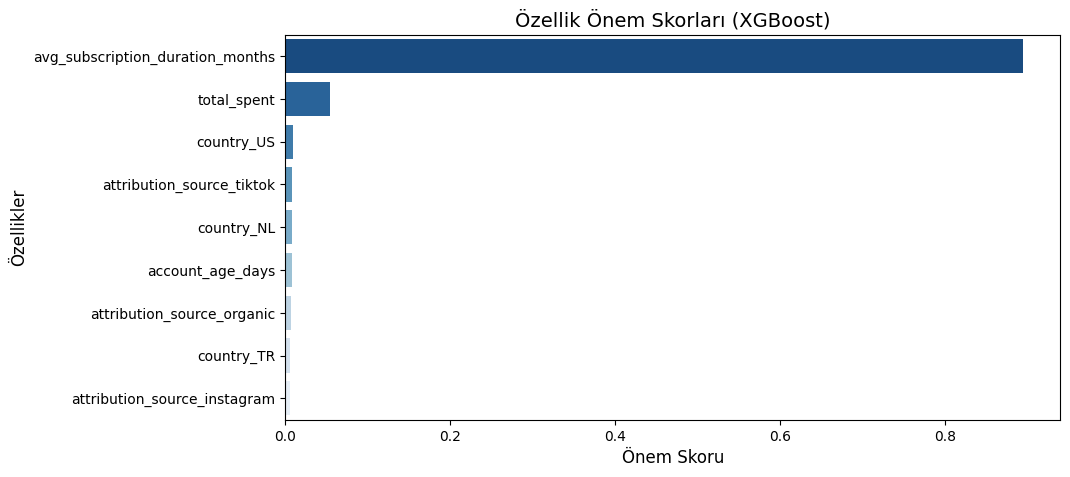

In [22]:
feature_importance = xgb_model.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="Blues_r")
plt.title("Özellik Önem Skorları (XGBoost)", fontsize=14)
plt.xlabel("Önem Skoru", fontsize=12)
plt.ylabel("Özellikler", fontsize=12)
plt.show()


#### SVM

In [23]:
from sklearn.svm import SVC

In [24]:
svm_model = SVC(
    kernel='rbf',       # Kernel seçimi: rbf, linear, poly, vb.
    probability=True,   # Gerekiyorsa tahmin olasılıkları
    random_state=42
)


In [25]:
svm_model.fit(X_train_scaled, y_train)



SVC(probability=True, random_state=42)

In [26]:
y_pred_svm = svm_model.predict(X_test_scaled)

In [27]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

print("SVM Model Accuracy:", accuracy_svm)
print("SVM Classification Report:\n", classification_rep_svm)


SVM Model Accuracy: 0.7860696517412935
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80        86
           1       1.00      0.63      0.77       115

    accuracy                           0.79       201
   macro avg       0.83      0.81      0.79       201
weighted avg       0.86      0.79      0.78       201



In [28]:
clark_kent_scaled = scaler.transform(clark_kent_features.drop(columns=["churn"], errors="ignore"))

churn_probability_svm = svm_model.predict_proba(clark_kent_scaled)[0][1]

sonuc = "Churn olmamış" if churn_probability_svm < 0.5 else "Churn olmuş/olacak"

print(sonuc, "Olasılık: ", churn_probability_svm)


Churn olmamış Olasılık:  0.3142326877380757


#### RANDOM FOREST

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf_model = RandomForestClassifier(
    n_estimators=100,        # Kaç adet ağaç
    max_depth=None,          # Ağacın maksimum derinliği
    random_state=42,
    class_weight='balanced'  # Dengesiz veri durumunda faydalı olabilir
)

In [33]:
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)


In [34]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7661691542288557
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.72      0.73      0.73        86
           1       0.80      0.79      0.79       115

    accuracy                           0.77       201
   macro avg       0.76      0.76      0.76       201
weighted avg       0.77      0.77      0.77       201



In [35]:
clark_kent_scaled = scaler.transform(clark_kent_features.drop(columns=["churn"], errors="ignore"))

churn_probability_svm = rf_model.predict_proba(clark_kent_scaled)[0][1]

sonuc = "Churn olmamış" if churn_probability_svm < 0.5 else "Churn olmuş/olacak"

print(sonuc, "Olasılık: ", churn_probability_svm)


Churn olmamış Olasılık:  0.12511098812208946


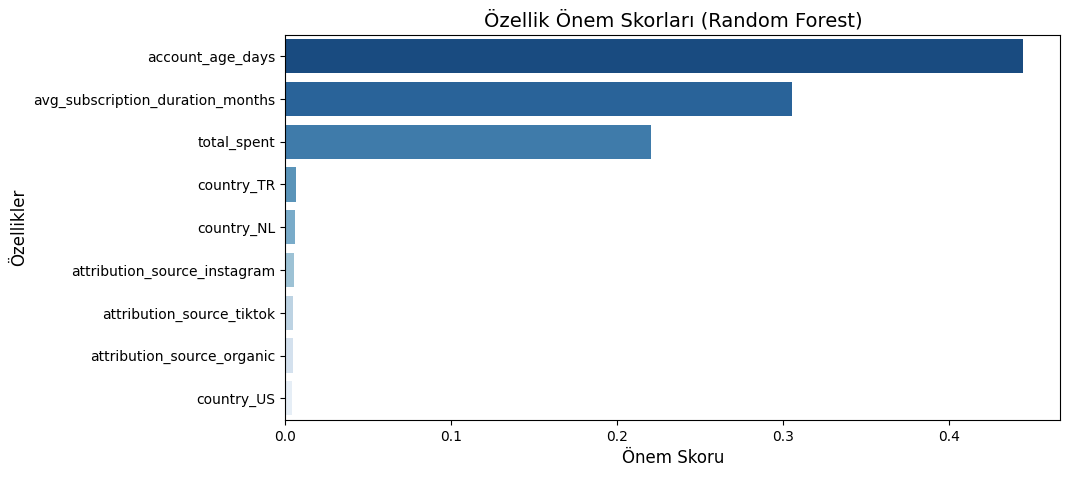

In [38]:
feature_importance = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="Blues_r")
plt.title("Özellik Önem Skorları (Random Forest)", fontsize=14)
plt.xlabel("Önem Skoru", fontsize=12)
plt.ylabel("Özellikler", fontsize=12)
plt.show()


#### YAPAY SİNİR AĞLARI

In [78]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 32)
        self.out = nn.Linear(32, 1)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.out(x)  
        return x

input_dim = X_train.shape[1]

model = ANN(input_dim)

# 3) Kayıp fonksiyonu (Binary Cross Entropy with Logits) ve optimizer (Adam)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

epochs = 20
batch_size = 32

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values if hasattr(y_train, 'values') else y_train, dtype=torch.float32)

num_samples = X_train_tensor.shape[0]
num_batches = int((num_samples - 1) / batch_size) + 1

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    
    # Her X veriyi karıştırmak için indeksleri permute edelim
    indices = torch.randperm(num_samples)
    
    for i in range(num_batches):
        start_i = i * batch_size
        end_i = start_i + batch_size
        
        batch_idx = indices[start_i:end_i]
        
        batch_x = X_train_tensor[batch_idx]
        batch_y = y_train_tensor[batch_idx]
        
        optimizer.zero_grad()
        outputs = model(batch_x)
        
        loss = criterion(outputs.view(-1), batch_y)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    avg_loss = running_loss / num_batches
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

model.eval()
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values if hasattr(y_test, 'values') else y_test, dtype=torch.float32)

with torch.no_grad():
    outputs = model(X_test_tensor).view(-1)
    probs = torch.sigmoid(outputs)
    y_pred = (probs >= 0.5).float()

from sklearn.metrics import accuracy_score, classification_report
acc = accuracy_score(y_test_tensor, y_pred)
print("ANN Test Accuracy:", acc)
print("Classification Report:\n", classification_report(y_test_tensor, y_pred))


Epoch [1/20], Loss: 0.6998
Epoch [2/20], Loss: 0.6945
Epoch [3/20], Loss: 0.6873
Epoch [4/20], Loss: 0.6719
Epoch [5/20], Loss: 0.6357
Epoch [6/20], Loss: 0.5678
Epoch [7/20], Loss: 0.4911
Epoch [8/20], Loss: 0.4496
Epoch [9/20], Loss: 0.4295
Epoch [10/20], Loss: 0.4173
Epoch [11/20], Loss: 0.4103
Epoch [12/20], Loss: 0.4050
Epoch [13/20], Loss: 0.4014
Epoch [14/20], Loss: 0.3984
Epoch [15/20], Loss: 0.3965
Epoch [16/20], Loss: 0.3941
Epoch [17/20], Loss: 0.3928
Epoch [18/20], Loss: 0.3909
Epoch [19/20], Loss: 0.3896
Epoch [20/20], Loss: 0.3884
ANN Test Accuracy: 0.7761194029850746
Classification Report:
               precision    recall  f1-score   support

         0.0       0.66      0.98      0.79        86
         1.0       0.97      0.63      0.76       115

    accuracy                           0.78       201
   macro avg       0.82      0.80      0.78       201
weighted avg       0.84      0.78      0.77       201



In [79]:
clark_kent_features = clark_kent_features.drop(columns=["churn"], errors="ignore")

clark_kent_scaled = scaler.transform(clark_kent_features)
clark_kent_tensor = torch.tensor(clark_kent_scaled, dtype=torch.float32)

model.eval()
with torch.no_grad():
    output = model(clark_kent_tensor).view(-1)      # tek örnek => shape [1, 1] -> [1]
    prob = torch.sigmoid(output)[0].item()          # sigmoid ile 0..1 aralığında olasılık

sonuc = "Churn olmuş/olacak" if prob >= 0.5 else "Churn olmamış"

print(f"Kullanıcı 1002 için tahmin: {sonuc} (Churn Olasılığı: {prob:.2f})")


Kullanıcı 1002 için tahmin: Churn olmamış (Churn Olasılığı: 0.29)


#### MODELLERİN DOĞRULUK ORANI KIYASLAMASI

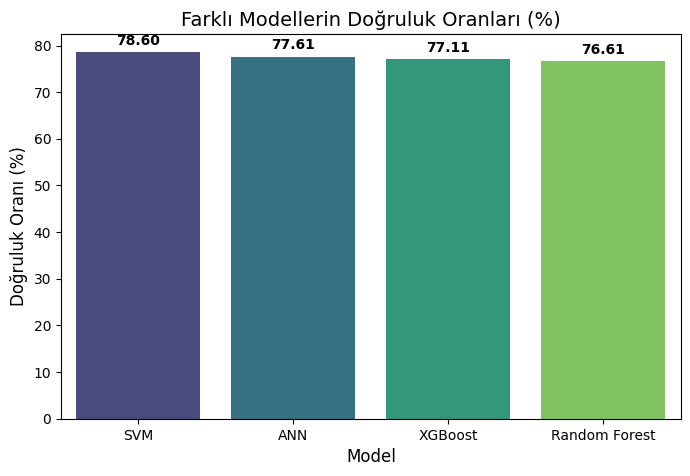

In [80]:
models = ["XGBoost", "SVM", "Random Forest", "ANN"]
accuracy_scores = [77.11, 78.60, 76.61, 77.61]

draw_bar_plot(
    x=models,
    y=accuracy_scores,
    title="Farklı Modellerin Doğruluk Oranları (%)",
    xlabel="Model",
    ylabel="Doğruluk Oranı (%)"
)

### DAHA SONRA 2. DURUMU XGBOOST, SVM, RANDOM FOREST GİBİ MAKİNE ÖĞRENMESİ ALGORİTMALARIYLA VE YAPAY SİNİR AĞIYLA TEST EDELİM.

#### VERİ SETİNİ MODELE UYGUN HALE GETİRME

In [40]:
import sqlite3
import pandas as pd
import numpy as np

db_path = "papcorns.sqlite"
conn = sqlite3.connect(db_path)

users_df = pd.read_sql_query("SELECT * FROM users;", conn)
events_df = pd.read_sql_query("SELECT * FROM user_events;", conn)

event_features = events_df.pivot_table(index="user_id", columns="event_name", aggfunc="size", fill_value=0).reset_index()

financial_features = events_df.groupby("user_id").agg(
    total_spent=("amount_usd", "sum")  # Kullanıcının toplam harcaması
).reset_index()

users_df["created_at"] = pd.to_datetime(users_df["created_at"])
current_date = pd.to_datetime(events_df["created_at"]).max()  # En son event tarihi
users_df["account_age_days"] = (current_date - users_df["created_at"]).dt.days

# Kullanıcının önceki abonelik sürelerinin ortalamasını hesaplayalım
subscription_start = events_df[events_df["event_name"] == "subscription_started"]
subscription_cancel = events_df[events_df["event_name"] == "subscription_cancelled"]

subscription_data = subscription_start.merge(subscription_cancel, on="user_id", suffixes=("_start", "_cancel"))
subscription_data["created_at_start"] = pd.to_datetime(subscription_data["created_at_start"])
subscription_data["created_at_cancel"] = pd.to_datetime(subscription_data["created_at_cancel"])
subscription_data["subscription_duration_months"] = (
    (subscription_data["created_at_cancel"].dt.year - subscription_data["created_at_start"].dt.year) * 12 +
    (subscription_data["created_at_cancel"].dt.month - subscription_data["created_at_start"].dt.month)
)

subscription_duration_features = subscription_data.groupby("user_id")["subscription_duration_months"].mean().reset_index()
subscription_duration_features.rename(columns={"subscription_duration_months": "avg_subscription_duration_months"}, inplace=True)

user_demographics = users_df[["id", "attribution_source", "country", "account_age_days"]]
user_demographics = pd.get_dummies(user_demographics, columns=["attribution_source", "country"], drop_first=False)

features_df = users_df[["id"]].merge(event_features, left_on="id", right_on="user_id", how="left") \
    .merge(financial_features, on="user_id", how="left") \
    .merge(subscription_duration_features, on="user_id", how="left") \
    .merge(user_demographics, left_on="id", right_on="id", how="left")

features_df = features_df.fillna(0)

features_df.set_index("id", inplace=True)

selected_features = [
    "subscription_cancelled", "subscription_renewed", "subscription_started",
    "trial_cancelled", "trial_started", "total_spent", "avg_subscription_duration_months",
    "account_age_days", "attribution_source_instagram", "attribution_source_organic",
    "attribution_source_tiktok", "country_NL", "country_TR", "country_US"
]

features_df = features_df[selected_features]
features_df

,subscription_cancelled,subscription_renewed,subscription_started,trial_cancelled,trial_started,total_spent,avg_subscription_duration_months,account_age_days,attribution_source_instagram,attribution_source_organic,attribution_source_tiktok,country_NL,country_TR,country_US
id,,,,,,,,,,,,,,
1,0,0,0,1,1,0.00,0.0,431,True,False,False,False,False,True
2,1,3,1,0,1,35.96,4.0,273,True,False,False,True,False,False
3,1,3,1,0,1,19.96,3.0,270,False,False,True,False,True,False
4,0,0,0,1,1,0.00,0.0,318,False,False,True,False,True,False
5,0,0,0,0,0,0.00,0.0,465,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,0,0,0,0,0,0.00,0.0,161,True,False,False,False,True,False
999,1,2,1,0,1,26.97,2.0,200,False,True,False,True,False,False
1000,0,0,0,1,1,0.00,0.0,149,False,True,False,True,False,False


In [41]:
features_df["churn"] = np.where(
    (features_df["subscription_started"] == 1) & (features_df["subscription_cancelled"] == 1),
    1,  # Churn
    0   # Churn değil
)

features_df = features_df.drop(columns=[
    "subscription_cancelled", "subscription_renewed", "subscription_started", 
    "trial_cancelled", "trial_started"
])

features_df


,total_spent,avg_subscription_duration_months,account_age_days,attribution_source_instagram,attribution_source_organic,attribution_source_tiktok,country_NL,country_TR,country_US,churn
id,,,,,,,,,,
1,0.00,0.0,431,True,False,False,False,False,True,0
2,35.96,4.0,273,True,False,False,True,False,False,1
3,19.96,3.0,270,False,False,True,False,True,False,1
4,0.00,0.0,318,False,False,True,False,True,False,0
5,0.00,0.0,465,False,True,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...
998,0.00,0.0,161,True,False,False,False,True,False,0
999,26.97,2.0,200,False,True,False,True,False,False,1
1000,0.00,0.0,149,False,True,False,True,False,False,0


In [42]:
clark_kent_features = features_df.loc[[1002]] 
features_df = features_df.drop(index=1002)  

X = features_df.drop(columns=["churn"])  

if "id" in X.columns:
    X = X.drop(columns=["id"])

# Eğer index olarak id atanmışsa, resetleyelim
X = X.reset_index(drop=True)

X

,total_spent,avg_subscription_duration_months,account_age_days,attribution_source_instagram,attribution_source_organic,attribution_source_tiktok,country_NL,country_TR,country_US
0,0.00,0.0,431,True,False,False,False,False,True
1,35.96,4.0,273,True,False,False,True,False,False
2,19.96,3.0,270,False,False,True,False,True,False
3,0.00,0.0,318,False,False,True,False,True,False
4,0.00,0.0,465,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
996,0.00,0.0,493,False,True,False,True,False,False
997,0.00,0.0,161,True,False,False,False,True,False
998,26.97,2.0,200,False,True,False,True,False,False
999,0.00,0.0,149,False,True,False,True,False,False


#### XGBOOST

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train_scaled, y_train)

C:\Users\MONSTER\.conda\envs\guncel\lib\site-packages\xgboost\core.py:158: UserWarning: [00:07:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [47]:
y_pred_xgb = xgb_model.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
print("XGBoost Model Accuracy: ", accuracy_xgb)
print("XGBoost Classification Report:\n", classification_rep_xgb)


XGBoost Model Accuracy:  0.7873754152823921
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.82      0.77       129
           1       0.85      0.76      0.80       172

    accuracy                           0.79       301
   macro avg       0.79      0.79      0.79       301
weighted avg       0.80      0.79      0.79       301



In [48]:
clark_kent_scaled = scaler.transform(clark_kent_features.drop(columns=["churn"], errors="ignore"))
churn_probability_xgb = xgb_model.predict_proba(clark_kent_scaled)[0][1]

sonuc = "Churn olmamış" if churn_probability_xgb < 0.5 else "Churn olmuş/olacak"
print(sonuc, "Olasılık: ", churn_probability_xgb)

Churn olmamış Olasılık:  0.035974566


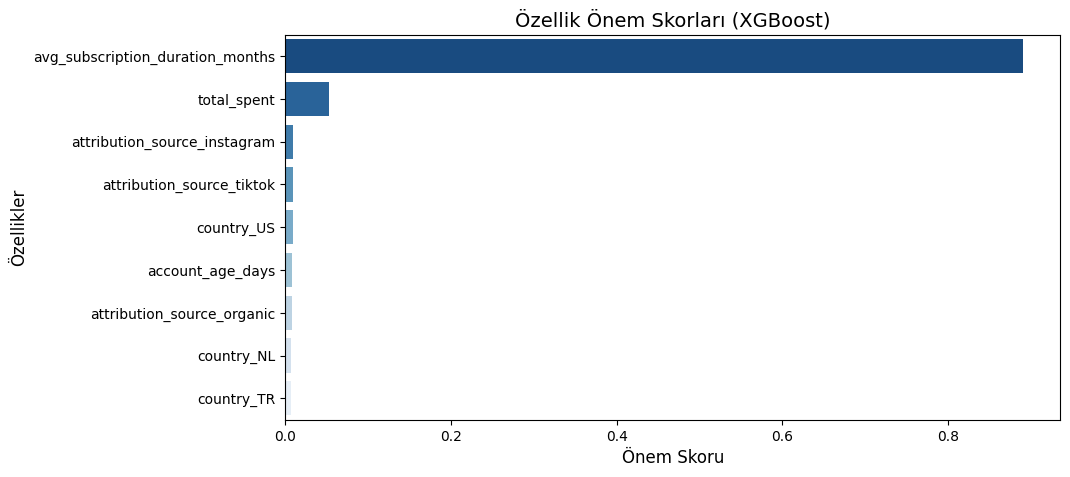

In [49]:
feature_importance = xgb_model.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="Blues_r")
plt.title("Özellik Önem Skorları (XGBoost)", fontsize=14)
plt.xlabel("Önem Skoru", fontsize=12)
plt.ylabel("Özellikler", fontsize=12)
plt.show()


#### SVM

In [111]:
from sklearn.svm import SVC


In [281]:
svm_model = SVC(
    kernel='rbf',       # Kernel seçimi: rbf, linear, poly, vb.
    probability=True,   # Gerekiyorsa tahmin olasılıkları
    random_state=42
)

In [282]:
svm_model.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

In [283]:
y_pred_svm = svm_model.predict(X_test_scaled)

In [284]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

print("SVM Model Accuracy:", accuracy_svm)
print("SVM Classification Report:\n", classification_rep_svm)


SVM Model Accuracy: 0.7906976744186046
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80       129
           1       1.00      0.63      0.78       172

    accuracy                           0.79       301
   macro avg       0.84      0.82      0.79       301
weighted avg       0.86      0.79      0.79       301



In [286]:
clark_kent_scaled = scaler.transform(clark_kent_features.drop(columns=["churn"], errors="ignore"))

churn_probability_svm = svm_model.predict_proba(clark_kent_scaled)[0][1]

sonuc = "Churn olmamış" if churn_probability_svm < 0.5 else "Churn olmuş/olacak"

print(sonuc, "Olasılık: ", churn_probability_svm)


Churn olmamış Olasılık:  0.3073251325792143


#### RANDOM FOREST

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf_model = RandomForestClassifier(
    n_estimators=100,        # Kaç adet ağaç
    max_depth=None,          # Ağacın maksimum derinliği
    random_state=42,
    class_weight='balanced'  # Dengesiz veri durumunda faydalı olabilir
)


In [52]:
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)


In [53]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.770764119601329
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       129
           1       0.80      0.80      0.80       172

    accuracy                           0.77       301
   macro avg       0.77      0.77      0.77       301
weighted avg       0.77      0.77      0.77       301



In [54]:
clark_kent_scaled = scaler.transform(clark_kent_features.drop(columns=["churn"], errors="ignore"))
churn_probability_svm = rf_model.predict_proba(clark_kent_scaled)[0][1]
sonuc = "Churn olmamış" if churn_probability_svm < 0.5 else "Churn olmuş/olacak"
print(sonuc, "Olasılık: ", churn_probability_svm)


Churn olmamış Olasılık:  0.04


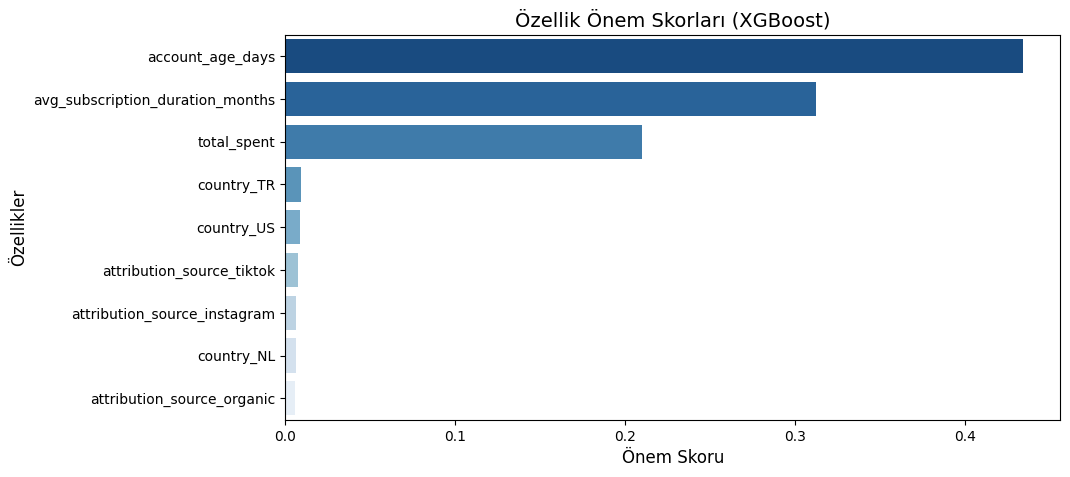

In [55]:
feature_importance = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="Blues_r")
plt.title("Özellik Önem Skorları (XGBoost)", fontsize=14)
plt.xlabel("Önem Skoru", fontsize=12)
plt.ylabel("Özellikler", fontsize=12)
plt.show()


#### YAPAY SİNİR AĞLARI

In [293]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 32)
        self.out = nn.Linear(32, 1)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.out(x)  
        return x

input_dim = X_train.shape[1]

model = ANN(input_dim)

# 3) Kayıp fonksiyonu (Binary Cross Entropy with Logits) ve optimizer (Adam)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

epochs = 20
batch_size = 32

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values if hasattr(y_train, 'values') else y_train, dtype=torch.float32)

num_samples = X_train_tensor.shape[0]
num_batches = int((num_samples - 1) / batch_size) + 1

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    
    # Her X veriyi karıştırmak için indeksleri permute edelim
    indices = torch.randperm(num_samples)
    
    for i in range(num_batches):
        start_i = i * batch_size
        end_i = start_i + batch_size
        
        batch_idx = indices[start_i:end_i]
        
        batch_x = X_train_tensor[batch_idx]
        batch_y = y_train_tensor[batch_idx]
        
        optimizer.zero_grad()
        outputs = model(batch_x)
        
        loss = criterion(outputs.view(-1), batch_y)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    avg_loss = running_loss / num_batches
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

model.eval()
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values if hasattr(y_test, 'values') else y_test, dtype=torch.float32)

with torch.no_grad():
    outputs = model(X_test_tensor).view(-1)
    probs = torch.sigmoid(outputs)
    y_pred = (probs >= 0.5).float()

from sklearn.metrics import accuracy_score, classification_report
acc = accuracy_score(y_test_tensor, y_pred)
print("ANN Test Accuracy:", acc)
print("Classification Report:\n", classification_report(y_test_tensor, y_pred))


Epoch [1/20], Loss: 0.6927
Epoch [2/20], Loss: 0.6852
Epoch [3/20], Loss: 0.6704
Epoch [4/20], Loss: 0.6418
Epoch [5/20], Loss: 0.5938
Epoch [6/20], Loss: 0.5330
Epoch [7/20], Loss: 0.4752
Epoch [8/20], Loss: 0.4394
Epoch [9/20], Loss: 0.4171
Epoch [10/20], Loss: 0.4038
Epoch [11/20], Loss: 0.3988
Epoch [12/20], Loss: 0.3938
Epoch [13/20], Loss: 0.3928
Epoch [14/20], Loss: 0.3915
Epoch [15/20], Loss: 0.3891
Epoch [16/20], Loss: 0.3875
Epoch [17/20], Loss: 0.3867
Epoch [18/20], Loss: 0.3851
Epoch [19/20], Loss: 0.3847
Epoch [20/20], Loss: 0.3836
DeeperANN Test Accuracy: 0.7774086378737541
Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.96      0.79       129
         1.0       0.96      0.64      0.77       172

    accuracy                           0.78       301
   macro avg       0.81      0.80      0.78       301
weighted avg       0.83      0.78      0.78       301



In [294]:
clark_kent_features = clark_kent_features.drop(columns=["churn"], errors="ignore")

clark_kent_scaled = scaler.transform(clark_kent_features)
clark_kent_tensor = torch.tensor(clark_kent_scaled, dtype=torch.float32)

model.eval()
with torch.no_grad():
    output = model(clark_kent_tensor).view(-1)     
    prob = torch.sigmoid(output)[0].item()        

sonuc = "Churn olmuş/olacak" if prob >= 0.5 else "Churn olmamış"

print(f"Kullanıcı 1002 için tahmin: {sonuc} (Churn Olasılığı: {prob:.2f})")


Kullanıcı 1002 için tahmin: Churn olmamış (Churn Olasılığı: 0.30)


#### MODELLERİN DOĞRULUK ORANI KIYASLAMASI

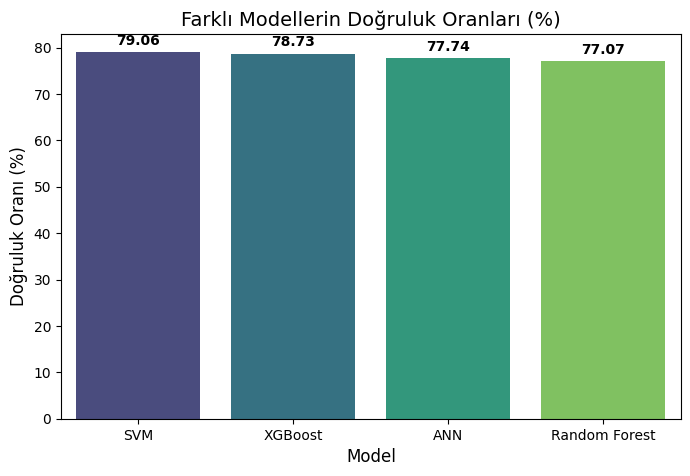

In [81]:
models = ["XGBoost", "SVM", "Random Forest", "ANN"]
accuracy_scores = [78.73, 79.06, 77.07, 77.74]

draw_bar_plot(
    x=models,
    y=accuracy_scores,
    title="Farklı Modellerin Doğruluk Oranları (%)",
    xlabel="Model",
    ylabel="Doğruluk Oranı (%)"
)

## 8. Predict the potential Lifetime Value (pLTV) for user #1001 (Bruce Wayne)



BU SORU İÇİN ÜÇ YÖNTEM İZLENEBİLİR.
1) CHURN RATE HESABINDAN YARARLANILARAK HESAPLAMA İŞLEMİ YAPILABİLİR.
2) MAKİNE ÖĞRENMESİ YÖNTEMLERİNDEN YARARLANARAK KULLANICILARIN OLASI KAÇ AY DAHA ÖDEME YAPMASI TAHMİN EDİLEBİLİR.
3) KULLANICIYLA BENZER DEMOGRAFİK YAPIDAKİ DİĞER KULLANICILARIN ÖZELLİKLERİ İNCELENEREK KULLANICIN RETENTION ANALİZİ (ELDE TUTMA) YAPILARAK KAÇ AY DAHA ÖDEME YAPMASI TAHMİN EDİLEBİLİR.

BURADA BELİRTİLEN ÜÇ YÖNTEMDE TEST EDİLMİŞTİR FAKAT 3. YÖNTEM MANTIKLI SONUÇ VERDİĞİNDEN DOLAYI SADECE ONA YER VERİLMİŞTİR.

**BURADA ÇOK KRİTİK BİR DURUM VARDIR!** 
user_df = 01.01.2024 - 16.02.2025
event_df = 01.01.2024 - 12.07.2025 tarihleri arasında kayıtı vardır. 
Fakat buradaki kritik durum şudur: 
Bazı kullanılıcılar triali başlatmış, ardından aboneliği başlatmış fakat sonrasında herhangi bir işlem yapmamıştır. Ne kayıt yenileme ne de iptal işlemi yapmamıştır. Örnek olarak 27, 37, 39, 48... başta olmak üzere 111 adet kullanıcıyı inceleyelim.

27 ID numaralı kullanıcı 22.02.2024 tarihinde "organic" platformundan "US" ülkesinden "Eve Taylor" isminden kayıt olmuş.  
22.02.2024 -> app_install
27.02.2024 -> trial_started
11.03.2024 --> subscription_started işlemlerini gerçekleştirmiştir. Fakat events_df tablosunda en son veri 12.07.2024 tarihinde mevcuttur. Yani bu 111 kullanıcının verisi eksiktir/yoktur/bilinmemektedir.

ÜÇ YÖNTEMİN YAPILIŞI VE AÇIKLAMASI ŞU ŞEKİLDEDİR:
1) CHURN RATE yöntemi tercih edilince kullanıcının churn etme olasılığı çok düşün gelince avg.spent/chrun rate formülünden çok yüksek bir ücret çıkıyor. Bu çıkan sonuç verilerin eksik/yetersiz/bilinmemezlik olmasından dolayı güven vermemektedir.
2) Makine Öğrenmesi yöntemi ile kaç ay daha ödeme yapacağını tahmini yapılması amaçlanmaktadır. Makine öğrenmesi yapıldığında verileri parçalamak, düzeltmek ve zenginleştirme işlemleri yapılması gerekmektedir. Bunları için aşağıdaki veri dönüştürme işlemleri yapıldı fakat overfitting olayı gerçekleştiğinden bu yöntem de kullanılmamıştır.
2.1) Burada kullanıcının kaç ay daha ödeme yapması nelere bağlı olabilir bu soru sorulacak cevap bulunması gerekmektedir. Kullanıcının hangi ülkeden geldiği (ülkenin ekonomik açısından etkisi), hangi platformdan geldiği (platformu kullanan kişilerin yapısına göre tiktok/instagram kitlesinin farklı olması durumu) bu durumu etkiler düşüncesiyle bu özellikler kullanılması gerekiyor diye düşündüm.
2.2) Kullanıcının ne kadar ücret ödeme yaptığı, ortalama ödeme yaptığı önemli değil.
2.3) Triali başlatmayan kimse subscription'u başlatmadığından trial'ı başlatmayanların verisini silmemiz gerekiyor.
2.4) Triali başlatıp subscription'u başlatmadan triali bitiren kişilerin de önemi yoktur. Onların da verisini silmemiz gerekiyor.
2.5) Triali başlattıktan kaç gün sonra subscription oldu? Bu veri önemlidir çünkü ne kadar hızlı başlattıysa uygulamayı o kadar beğeniyor demek.
2.6) Kaç ay subscription olarak kaldı? Bu veri de önemli
Bu kriterleri göz önüne bulundurarak **REGRESSION** modeli geliştirdim fakat overfitting olduğundan kullanmadım.
3) Benzer demografik yapılara sahip kullanıcıların özellikleri göz önünde alınarak **RETENTION** bilgisi elde edildi. Retention bir müşteriyi elde tutma olasılığıdır. Bunu hesaplamak için "SUBSCRIPTION_STARTED" ve "SUBSCRIPTION_CANCELLED" günleri arasındaki fark alınarak "ACTIVE" gün sayısı hesaplandı. RETENTION formülü aşağıdaki görselle verilmiştir.

pLTV hesabının formülü: ARPU (Average Revenue Per User) * BEKLENEN ÖDEME MİKTARI

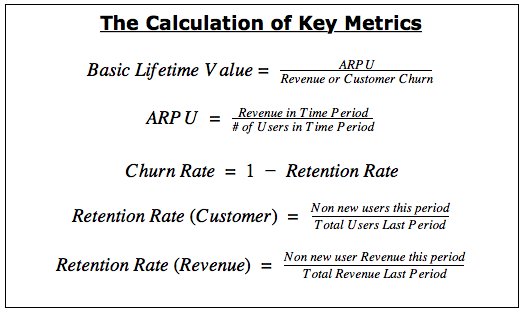

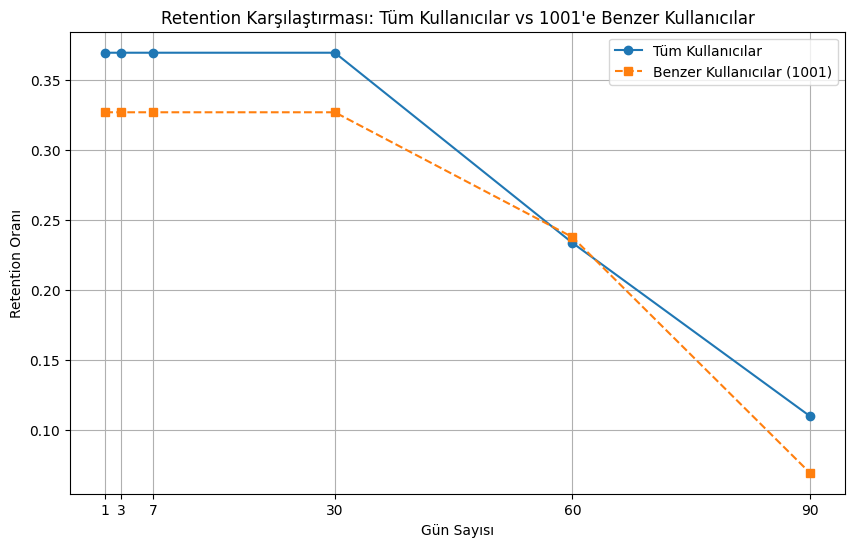

In [56]:
db_path = "papcorns.sqlite"
conn = sqlite3.connect(db_path)

users_df = pd.read_sql_query("SELECT * FROM users;", conn)
events_df = pd.read_sql_query("SELECT * FROM user_events;", conn)

bruce_wayne = users_df[users_df["id"] == 1001]

similar_users = users_df[
    (users_df["attribution_source"] == bruce_wayne["attribution_source"].values[0]) &
    (users_df["country"] == bruce_wayne["country"].values[0])
]

retention_days = [1, 3, 7, 30, 60, 90]

subscription_start_events = events_df[events_df["event_name"] == "subscription_started"]
subscription_cancel_events = events_df[events_df["event_name"] == "subscription_cancelled"]

retention_rates_all_users = {}
retention_rates_similar_users = {}

for days in retention_days:
    active_users = subscription_start_events.merge(
        subscription_cancel_events, on="user_id", how="left", suffixes=("_start", "_cancel")
    )
    
    active_users["created_at_start"] = pd.to_datetime(active_users["created_at_start"])
    active_users["created_at_cancel"] = pd.to_datetime(active_users["created_at_cancel"])
    
    active_users["days_active"] = (active_users["created_at_cancel"] - active_users["created_at_start"]).dt.days
    
    retained_users_all = active_users[active_users["days_active"] >= days]
    retention_rate_all = len(retained_users_all) / len(users_df) if len(users_df) > 0 else 0
    retention_rates_all_users[f"{days}_day_retention"] = retention_rate_all

    retained_users_similar = active_users[(active_users["user_id"].isin(similar_users["id"])) & (active_users["days_active"] >= days)]
    retention_rate_similar = len(retained_users_similar) / len(similar_users) if len(similar_users) > 0 else 0
    retention_rates_similar_users[f"{days}_day_retention"] = retention_rate_similar


plt.figure(figsize=(10, 6))
plt.plot(retention_days, list(retention_rates_all_users.values()), marker="o", linestyle="-", label="Tüm Kullanıcılar")
plt.plot(retention_days, list(retention_rates_similar_users.values()), marker="s", linestyle="--", label="Benzer Kullanıcılar (1001)")
plt.xlabel("Gün Sayısı")
plt.ylabel("Retention Oranı")
plt.title("Retention Karşılaştırması: Tüm Kullanıcılar vs 1001'e Benzer Kullanıcılar")
plt.legend()
plt.grid(True)
plt.xticks(retention_days)
plt.show()


In [57]:
import sqlite3
import pandas as pd
import numpy as np
import math

db_path = "papcorns.sqlite"
conn = sqlite3.connect(db_path)

users_df = pd.read_sql_query("SELECT * FROM users;", conn)
events_df = pd.read_sql_query("SELECT * FROM user_events;", conn)

bruce_wayne = users_df[users_df["id"] == 1001]

similar_users = users_df[
    (users_df["attribution_source"] == bruce_wayne["attribution_source"].values[0]) &
    (users_df["country"] == bruce_wayne["country"].values[0])
]

retention_days = [1, 3, 7, 30, 60, 90]

subscription_start_events = events_df[events_df["event_name"] == "subscription_started"]
subscription_cancel_events = events_df[events_df["event_name"] == "subscription_cancelled"]

retention_rates = {}

for days in retention_days:
    active_users = subscription_start_events.merge(
        subscription_cancel_events, on="user_id", how="left", suffixes=("_start", "_cancel")
    )
    
    active_users["created_at_start"] = pd.to_datetime(active_users["created_at_start"])
    active_users["created_at_cancel"] = pd.to_datetime(active_users["created_at_cancel"])
    
    active_users["days_active"] = (active_users["created_at_cancel"] - active_users["created_at_start"]).dt.days
    
    retained_users = active_users[(active_users["user_id"].isin(similar_users["id"])) & (active_users["days_active"] >= days)]
    
    retention_rate = len(retained_users) / len(similar_users) if len(similar_users) > 0 else 0
    retention_rates[f"{days}_day_retention"] = retention_rate


total_revenue = events_df[
    (events_df["user_id"].isin(similar_users["id"])) & (events_df["event_name"] == "subscription_renewed")
]["amount_usd"].sum()

total_payments = events_df[
    (events_df["user_id"].isin(similar_users["id"])) & (events_df["event_name"] == "subscription_renewed")
].shape[0]

arpu_corrected = total_revenue / total_payments if total_payments > 0 else 0

similar_users_payments = events_df[
    (events_df["user_id"].isin(similar_users["id"])) & (events_df["event_name"] == "subscription_renewed")
].groupby("user_id").size().mean()

expected_payments = similar_users_payments * sum(retention_rates.values())
expected_payments = math.ceil(expected_payments)
bruce_wayne_pLTV_corrected = arpu_corrected * expected_payments

{
    "ARPU (Average Revenue Per User)": arpu_corrected,
    "Expected Payments for Bruce Wayne": expected_payments,
    "Predicted Lifetime Value (pLTV)": bruce_wayne_pLTV_corrected
}


{'ARPU (Average Revenue Per User)': 9.99,
 'Expected Payments for Bruce Wayne': 4,
 'Predicted Lifetime Value (pLTV)': 39.96}